### Normal Simulation

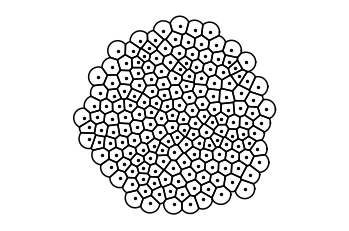

In [341]:
from Organoid2D import Organoid
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

org = Organoid()
org.evolution(T=0.001, file = 'organoid_mid.csv', mode='transcription')
org.cellPlot()

### PCF examples

#### Mesh divided cell clusters

-0.2294922617689558


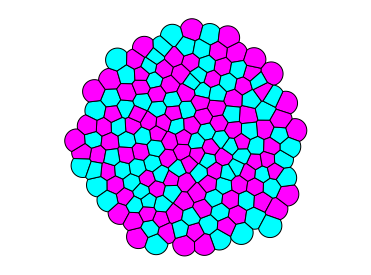

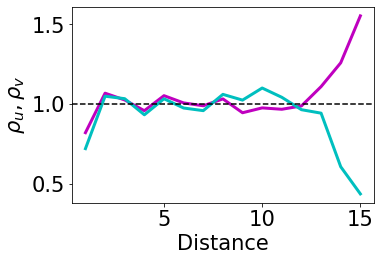

In [353]:
org.mesh = {}

# Number of lines in that dimension which cut through the organoid
Nx = 13
Ny = 13

x = np.linspace(np.min(org.xy[:,0]) - org.r_max/2, np.max(org.xy[:,0]) + org.r_max/2, Nx+2)
y = np.linspace(np.min(org.xy[:,1]) - org.r_max/2, np.max(org.xy[:,1]) + org.r_max/2, Ny+2)

org.G = np.zeros(org.nofCells)
for i in range(Nx+1):
    for j in range(Ny+1):
        if (i+j)%2 == 0:
            org.G[(x[i] <= org.xy[:,0]) & (org.xy[:,0] < x[i+1]) & (y[j] <= org.xy[:,1]) & (org.xy[:,1] < y[j+1])] = 1   

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
org.N = 1 - org.G
org.cellPlot(org.G, size=0)
plt.savefig('test.png', transparent=True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nx='+str(Nx)+'_ny='+str(Ny)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nx='+str(Nx)+'_ny='+str(Ny)+'.pdf', transparent = True)

#im = plt.imread('test.png')

fig=plt.figure()
org.pcf(font_size = 14*3/2, lw = 3)
plt.gcf().subplots_adjust(bottom=0.2)
plt.gcf().subplots_adjust(left=0.2)
#newax = fig.add_axes([.64,.64,0.5,0.5], zorder=1)
#newax.imshow(im)
#newax.axis('off')
plt.savefig('Results/PhD Thesis/PCF examples/PCF_nx='+str(Nx)+'_ny='+str(Ny)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/PCF_nx='+str(Nx)+'_ny='+str(Ny)+'.pdf', transparent = True)

org.moran()
print(org.Morans_I)

#### Radially divided cell clusters

0.7757160425813704


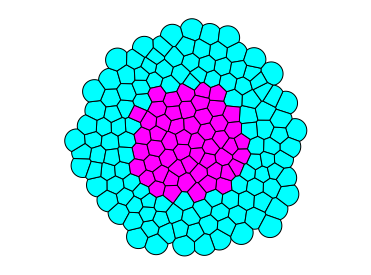

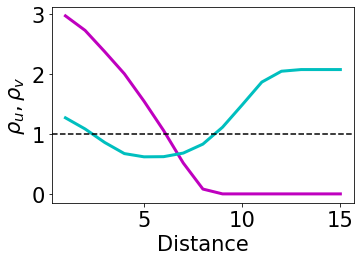

In [360]:
center = np.mean(org.xy, axis=0)
norm = ((org.xy[:,0]-center[0])**2 + (org.xy[:,1]-center[1])**2)**0.5
r_max = np.max(norm)

Nr = 1
r = np.linspace(0,r_max,Nr+2)

org.G = np.zeros(org.nofCells)
for i in range(Nr+1):
    if i%2 == 0:
        org.G[(r[i] < norm) & (norm <= r[i+1])] = 1

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
org.N = 1 - org.G
org.cellPlot(org.G, size=0)
#plt.savefig('test.png', transparent=True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nr='+str(Nr)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/Org_nr='+str(Nr)+'.pdf', transparent = True)

#im = plt.imread('test.png')
#
fig=plt.figure()
org.pcf(font_size = 14*3/2, lw=3)
plt.gcf().subplots_adjust(bottom=0.2)
plt.gcf().subplots_adjust(left=0.2)
#newax = fig.add_axes([.64,.64,0.5,0.5], zorder=1)
#newax.imshow(im)
#newax.axis('off')

plt.savefig('Results/PhD Thesis/PCF examples/PCF_nr='+str(Nr)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/PCF_nr='+str(Nr)+'.pdf', transparent = True)

org.moran()
print(org.Morans_I)

### Cell pair visualization

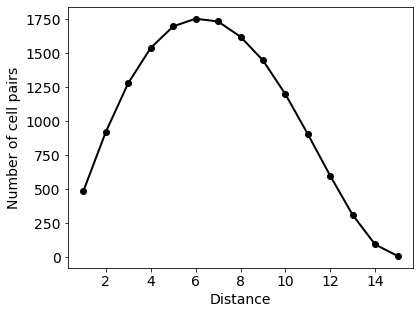

In [256]:
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)

pairs = np.empty(int(np.max(org.GraphDist)))
for i in range(len(pairs)):
    pairs[i] = len(org.GraphDist[org.GraphDist == i+1])/2
    
distances = list(range(1,len(pairs)+1))

plt.plot(distances, pairs, lw = 2, marker='o', color='k')
plt.gcf().subplots_adjust(left=0.15)
plt.xlabel('Distance')
plt.ylabel('Number of cell pairs')
plt.savefig('Results/PhD Thesis/PCF examples/cell_pair_dist.png', transparent = True)
plt.savefig('Results/PhD Thesis/PCF examples/cell_pair_dist.pdf', transparent = True)

### Moran's I examples

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import pandas as pd

Nx = 8
d = 1

xy = np.empty([Nx*Nx, 2])
for i in range(Nx):
    for j in range(Nx):
        xy[i*Nx+j] = [j*d, i*d]
        
def neighbors(i, N):
    ix = i%N
    iy = int((i-ix)/N)
    
    if int(i/N)%2 == 0:
        ilr = - 1
    else:
        ilr = 1
    
    # above
    n1 = (iy + 1)*N + (ix + 0)%N
    
    # same row 
    n2 = (iy + 0)*N + (ix + 1)%N
    n3 = (iy + 0)*N + (ix - 1)%N
    
    # below
    n4 = (iy - 1)*N + (ix + 0)%N
    
    return [n1%N**2,n2%N**2,n3%N**2,n4%N**2]
        
def fate_distribution(org, dist_type):
    if dist_type == 'random':
        org.N = np.round(np.random.random(org.nofCells))
    if dist_type == 'cluster':
        center = np.mean(org.xy, axis=0)
        org.N = np.zeros(org.nofCells)
        org.N[org.xy[:,0] -  center[0] < 0] = 1
    if dist_type == 'checkerboard':
        for i in range(Nx):
            for j in range(Nx):
                if (i+j)%2==0:
                    org.N[i*Nx+j] = 1
    
    org.G = 1 - org.N
    
    return

import pandas as pd
df = pd.DataFrame()
df['x-Position'] = xy[:,0]
df['y-Position'] = xy[:,1]
df['Radius'] = np.ones(len(xy))*0.7
df.to_csv('8x8.csv', index = False)

from Organoid2D import Organoid

org = Organoid()
org.GraphDist = np.zeros([len(xy), len(xy)])
for i in range(len(xy)):
    org.GraphDist[i, neighbors(i, Nx)] = 1
    
org.evolution(T=0.001, file='8x8.csv', mode="transcription")

fate_distribution(org, 'cluster')

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
org.cellPlot(org.N, size=0)

org.moran()
print(org.Morans_I)

plt.savefig('Results/PhD Thesis/Moran examples/I='+"{:.3f}".format(org.Morans_I)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/Moran examples/I='+"{:.3f}".format(org.Morans_I)+'.pdf', transparent = True)

### Visualization of forces acting on two cells

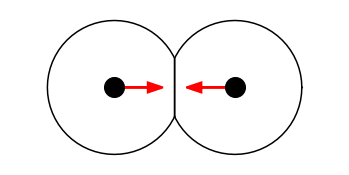

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from Organoid2D import Organoid

org = Organoid()
d = 0.9
org.xy = np.array([[-d,0],[d,0]])
org.r = np.array([1, 1])
org.nofCells = 2
org.dist = cdist(org.xy, org.xy)

plt.figure()
org.cellPlot(size = 400)
#plt.axis('on')
for xy in org.xy:
    if d < 0.7:
        plt.arrow(xy[0], xy[1], np.sign(xy[0])*0.5, 0, head_width=.15, lw=2, color='r')
    if d > 0.7 and d < 1:
        plt.arrow(xy[0], xy[1], -np.sign(xy[0])*0.5, 0, head_width=.15, lw=2, color='r')
plt.axis('square')
plt.xlim([-2.5,2.5])
plt.ylim([-1.2,1.2])

plt.savefig('Results/PhD Thesis/Displacement pictures/cells_d='+str(d)+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/cells_d='+str(d)+'.pdf', transparent = True)

### Morse potential

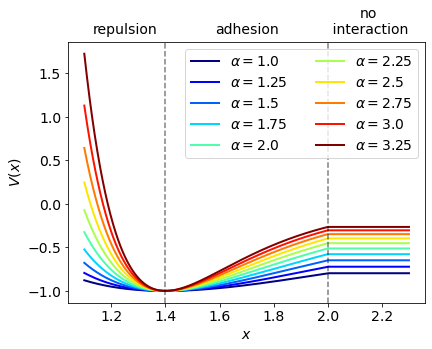

In [206]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')

def morse_potential(x, a, σ):
    V = np.exp(-2*a*(x - σ*2)) - 2*np.exp(-a*(x - σ*2))
    V[x >= 2] = np.exp(-2*a*(2 - σ*2)) - 2*np.exp(-a*(2 - σ*2))
    return V

N = 10
x = np.linspace(1.1,2.3,1000)
A = np.linspace(1,3.25,N)
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
color_spacing = np.linspace(0,1,N)
for i in range(N):
    rgba = cmap(color_spacing[i])
    plt.plot(x, morse_potential(x, A[i], 0.7), label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)
    
plt.axvline(1.4, color='k', ls='dashed', alpha = 0.5)
plt.axvline(2, color='k', ls='dashed', alpha = 0.5)
plt.xlabel("$x$")
plt.ylabel("$V(x)$")

y0, y1 = plt.ylim()
y = y1 + .03*(abs(y0)+abs(y1))
plt.text((x[0]+1.4)/2,y,"repulsion",horizontalalignment='center')
plt.text((1.4+2)/2,y,"adhesion",horizontalalignment='center')
plt.text((x[-1]+2)/2,y,"no\n interaction",horizontalalignment='center')
plt.legend(ncol=2)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_potential.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_potential.pdf', transparent = True)

### Morse potential derivative (force)

2.21 -5.0 2.0


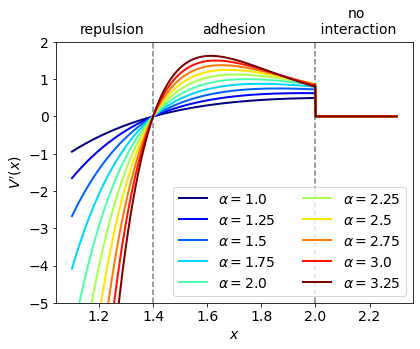

In [238]:
def morse_force(x, a, σ):
    F = - 2*a*np.exp(-2*a*(x - σ*2)) + 2*a*np.exp(-a*(x - σ*2))
    F[x >= 2] = 0
    return F

N = 10
x = np.linspace(1.1,2.3,1000)
A = np.linspace(1,3.25,N)
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
color_spacing = np.linspace(0,1,N)
for i in range(N):
    rgba = cmap(color_spacing[i])
    plt.plot(x, morse_force(x, A[i], 0.7), label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)
    
plt.axvline(1.4, color='k', ls='dashed', alpha = 0.5)
plt.axvline(2, color='k', ls='dashed', alpha = 0.5)
plt.xlabel("$x$")
plt.ylabel("$V'(x)$")

y0, y1 = plt.ylim([-5,2])
y = y1 + .03*(abs(y0)+abs(y1))
print(y, y0, y1)
plt.text((x[0]+1.4)/2,y,"repulsion",horizontalalignment='center')
plt.text((1.4+2)/2,y,"adhesion",horizontalalignment='center')
plt.text((x[-1]+2)/2,y,"no\n interaction",horizontalalignment='center')
plt.legend(ncol=2)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_force.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/morse_force.pdf', transparent = True)

### Cell division distance using Lambert W function <span style="color:red">(does not work since function argument is $-<\frac{1}{e}$)</span>

-0.09969792046063913 -0.36787944117144233
-0.06870494983790335 -0.36787944117144233
-0.054482661416751066 -0.36787944117144233
-0.04891085200377088 -0.36787944117144233
-0.047982405417245966 -0.36787944117144233
-0.04961289525424915 -0.36787944117144233
-0.05267941765222728 -0.36787944117144233
-0.05656224972204125 -0.36787944117144233
-0.06091345070883331 -0.36787944117144233
-0.06553522843973264 -0.36787944117144233


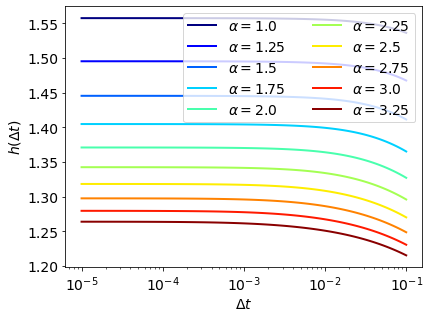

In [356]:
from scipy.special import lambertw

a = 1
F0 = .1
r = 0.95/2**(1/3)
s = 0.7

DT = np.logspace(-5,-1,K)

N = 10
A = np.linspace(1,3.25,N)
color_spacing = np.linspace(0,.99,N)

K = 100
DT = np.logspace(-5,-1,K)
plt.figure(figsize=[6.4, 4.8])

plt.rc('font', size=14)
for i in range(N):
    H = np.empty(K)
    rgba = cmap(color_spacing[i])
    for j in range(K):
        rhs = - 2*A[i]*F0*DT[j] + np.exp(-2*A[i]*s*r) + np.log(1 - np.exp(-2*A[i]*s*r))
        x = np.log(-lambertw(-np.exp(rhs-1))+1)
        H[j] = np.real(x/A[i] + 2*s*r)
    
    print(rhs, -1/np.exp(1))
    plt.plot(DT, H, label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)

plt.xscale('log')
plt.xlabel("$\Delta t$")
plt.ylabel("$h(\Delta t)$")
plt.legend(ncol=2)

### Cell division distance using nonlinear solver

C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log


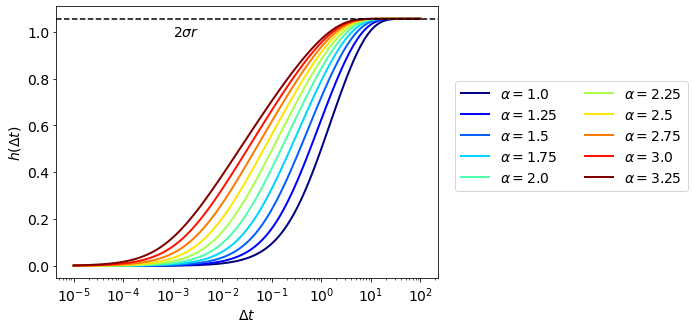

In [146]:
from scipy.optimize import fsolve
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')

a = 1
F0 = .1
r = 0.95/2**(1/3)
sigma = 0.7

f = lambda h, dt, a: 2*a*F0*dt + np.exp(a*(h-2*r*sigma)) + np.log(1 - np.exp(a*(h-2*r*sigma))) \
                    - np.exp(a*(-2*r*sigma)) - np.log(1 - np.exp(a*(-2*r*sigma)))

N = 10
A = np.linspace(1,3.25,N)
color_spacing = np.linspace(0,1,N)

K = 100
DT = np.logspace(-5,2,K)

plt.figure(figsize=[11, 4.8])
plt.rc('font', size=14)
for i in range(N):
    H = np.empty(K)
    rgba = cmap(color_spacing[i])
    for j in range(K):
        F = lambda h: f(h, DT[j], A[i])
        dF = lambda h: -A[i]*np.exp(A[i]*(h-2*r*sigma))/(np.exp(-A[i]*(h-2*r*sigma))-1)
        H[j] = fsolve(F, 1.9999*sigma*r, fprime=dF)
        
    plt.plot(DT, H, label="$\\alpha = " + str(A[i]) + "$", lw=2, color=rgba)

plt.text(0.001,2*sigma*r - 0.075,"$2 \\sigma r$")
plt.axhline(2*sigma*r, linestyle='dashed', color='k', zorder=10)
plt.xscale('log')
plt.xlabel("$\Delta t$")
plt.ylabel("$h(\Delta t)$")
plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(1.35, .75))

#plt.gcf().subplots_adjust(right=0.5)
plt.tight_layout()
plt.savefig('Results/PhD Thesis/Displacement pictures/division_distance.png', transparent = True)
plt.savefig('Results/PhD Thesis/Displacement pictures/division_distance.pdf', transparent = True)

In [453]:
print(a)
print(F0)
print(r)
print(sigma)

1
0.1
0.7540154996848947
0.7


### Radius growth equation

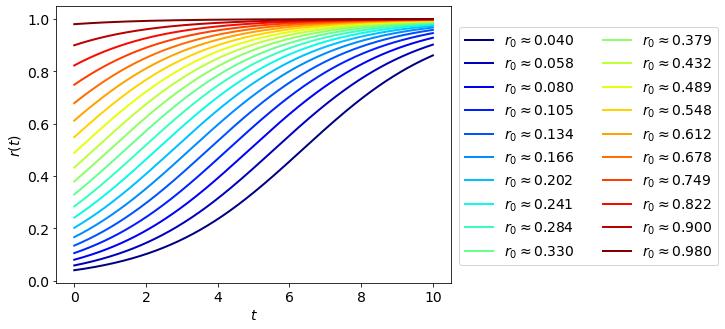

In [104]:
import matplotlib

def radius(t, k, r0, r_max):
    return r_max/(1 + ((r_max - r0)/r0)*np.exp(-k*r_max*t))

cmap = matplotlib.cm.get_cmap('jet')

k = 0.5
r_max = 1
T = 10
nofSteps = 1000
t = np.linspace(0,T,nofSteps)

f = lambda r: k*r*(r_max - r)

N = 20
r0 = np.linspace(0.2,0.99,N)**2
#r0 = np.logspace(-3,0,N)
color_spacing = np.linspace(0,1,N)

plt.figure(figsize=[11.5, 4.8])
plt.rc('font', size=14)
for i in range(N):
    
    rgba = cmap(color_spacing[i])
    r = radius(t, k, r0[i], r_max)
    
    plt.plot(t, r, label="$r_0 \\approx " + "{:.3f}".format(r0[i]) + "$", lw=2, color=rgba)
    
plt.xlabel('$t$')
plt.ylabel('$r(t)$')
plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(1.35, 0.95))

plt.tight_layout()

plt.savefig('Results/PhD Thesis/Radius pictures/radius_logistic.png', transparent = True)
plt.savefig('Results/PhD Thesis/Radius pictures/radius_logistic.pdf', transparent = True)

### Equations of motion (fully inert / constant mass / none)

6.4641824147938136e-24 6.4641824147938136e-24 9.320058205649722e-16 4.188790204786391e-12 144180000.00000003


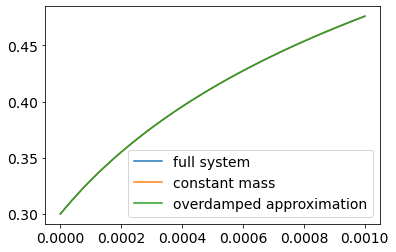

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def morse_force(x, r, a, σ):
    F = - 2*a*np.exp(-2*a*(x - σ*r*2)) + 2*a*np.exp(-a*(x - σ*r*2))
    if F >= 2:
        F = 0
    return F

def radius(t, k, r0, r_max):
    return r_max/(1 + ((r_max - r0)/r0)*np.exp(-k*r_max*t))

x_ref = 2*1e-5
m_ref = 4/3*np.pi*(x_ref/2)**3*1e3
b = 3*np.pi*8.9*1e-4*x_ref
T_ref = 3600
k = .5

α = m_ref*x_ref/T_ref**2
β = m_ref*x_ref/T_ref**2
γ = b*x_ref/T_ref
F0 = 1e-15
print(α, β, γ, m_ref, γ/α)

N = 10000
t = np.linspace(0,0.001,N)

def f_full(u,t):
    x = u[0]
    v = u[1]
    
    r = radius(t, k, 0.7, 1)
    dm = 4*np.pi*0.5*r**3*(1 - r)
    
    F = morse_force(x, r, 3, 0.7)
    
    rhs = np.empty(len(u))
    rhs[0] = v
    rhs[1] = - β/α*dm*v - γ/α*v - F0/α*F
    
    return rhs

def f_mass(u,t):
    x = u[0]
    v = u[1]
    
    r = radius(t, k, 0.7, 1)
    F = morse_force(x, r, 3, 0.7)
    
    rhs = np.empty(len(u))
    rhs[0] = v
    rhs[1] = - γ/α*v - F0/α*F
    
    return rhs

def f_none(u,t):
    x = u[0]
    
    r = radius(t, k, 0.7, 1)
    F = morse_force(x, r, 3, 0.7)
    
    rhs = - F0/γ*F
    
    return rhs

u_full = odeint(f_full, [.3,0], t)
u_mass = odeint(f_mass, [.3,0], t)
u_none = odeint(f_none, .3, t)

plt.plot(t, u_full[:,0], label='full system')
plt.plot(t, u_mass[:,0], label='constant mass')
plt.plot(t, u_none, label='overdamped approximation')
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

T = 10
N = 10000
t = np.linspace(0,T,N)
dt = t[1]-t[0]

x = np.zeros(N)
u = np.zeros(N)
y = np.zeros(N)
v = np.zeros(N)
m = np.zeros(N)
z = np.zeros(N)

k = 30
M = 10
m_max = 1.2*M
alpha = 1

γ = 60

z[0] = 1

def f1(u,t):
    x = u[0]
    v = u[1]
    
    rhs = np.empty(len(u))
    rhs[0] = v
    rhs[1] = -k/M*x - γ/M*v
    
    return rhs

def f2(u,t):
    x = u[0]
    v = u[1]
    m = u[2]
    
    rhs = np.empty(len(u))
    rhs[0] = v
    rhs[1] = - k/m*x - γ/m*v + alpha*(m_max - m)*v
    rhs[2] = alpha*m*(m_max - m)
    
    return rhs

def f3(u,t):
    return -k*u/γ

u1 = odeint(f1, [1,0], t)
u2 = odeint(f2, [1,0,0.7*M], t)
u3 = odeint(f3, 1, t)
    
plt.plot(t, u1[:,0], label='constant mass')
plt.plot(t, u2[:,0], label='variable mass')
plt.plot(t, u3, label='overdamped appr.')
plt.legend()

print('damping ratio =', γ/2/(M*k)**(1/2))

### Organoid growth rate

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from Organoid import Organoid
from scipy.optimize import curve_fit
import pandas as pd

N = 100
T = np.random.uniform(1,24,N)

nofCells = np.empty(N)
for i in range(N):
    org = Organoid()
    org.k = 0.07
    org.evolution(T=30, dim=2, ignore=['transcription', 'displacement'])
    nofCells[i] = org.nofCells
    
plt.scatter(T, nofCells)
plt.plot(T, np.exp(Λ1*T), label = "$\\Lambda_{0,24}$")
plt.plot(T, np.exp(Λ2*T), label = "$\\Lambda_{24,48}$")
plt.plot(T, np.exp(Λ3*T), label = "$\\Lambda_{0,48}$")
#plt.yscale('log')

#popt, _ = curve_fit(f, )

KeyboardInterrupt: 

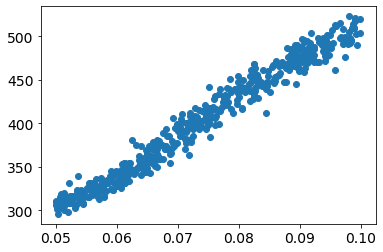

In [220]:
n0 = 200
n24 = 441.735294117647
n48 = 1041.2380952380954

N = 500
K = np.random.uniform(0.05,0.1,N)
dim = 3
dim_scal = 1/2**(1/dim)

nofCells = np.empty(N)
for j in range(len(K)):
    org = Organoid()
    org.k = K[j]
    
    initial_org = pd.DataFrame()
    initial_org['x-Position'] = np.random.uniform(0,1,200)
    initial_org['y-Position'] = np.random.uniform(0,1,200)
    initial_org['z-Position'] = np.random.uniform(0,1,200)
    initial_org['Radius'] = np.random.uniform(0.9*dim_scal, 1, 200)
    initial_org.to_csv('test.csv', index=False)
    
    org.evolution(T=24, dim=3, file='test.csv', ignore=['transcription', 'displacement'])
    nofCells[j] = org.nofCells
    
plt.scatter(K, nofCells)

0.08278662224952961


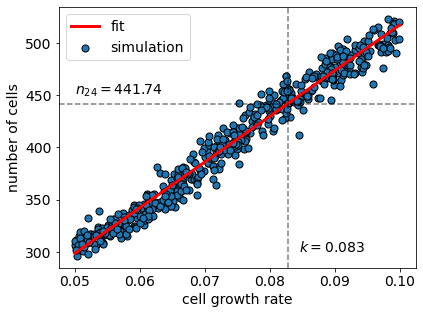

In [267]:
from scipy.optimize import curve_fit

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.scatter(K, nofCells, linewidths=1, edgecolors='k', label='simulation', s=50)
plt.axhline(n24, color = 'k', linestyle = 'dashed', alpha = 0.5)

k = np.linspace(0.05,0.1,1000)
f = lambda x, a, b: a*x + b

popt, pcov = curve_fit(f, K, nofCells)
plt.plot(k, f(k,*popt), color='r', lw=3, label='fit')
print(n24/popt[0] - popt[1]/popt[0])
plt.axvline(n24/popt[0] - popt[1]/popt[0], color = 'k', linestyle = 'dashed', alpha = 0.5)
plt.text(0.05,n24+n24*0.02,"$n_{24} = 441.74$")
plt.text(n24/popt[0] - popt[1]/popt[0]+(n24/popt[0] - popt[1]/popt[0])*0.02,300,"$k = 0.083$")
plt.legend()

plt.xlabel('cell growth rate')
plt.ylabel('number of cells')

plt.savefig('Results/PhD Thesis/Radius pictures/growth_rate_estimation.png', transparent = True)
plt.savefig('Results/PhD Thesis/Radius pictures/growth_rate_estimation.pdf', transparent = True)

In [222]:
N = 500
T = np.random.uniform(0,270,N)

nofCells2D = np.empty(N)
for j in range(N):
    org = Organoid()
    org.k = 0.083
    org.evolution(T=T[j], dim=2, ignore=['transcription', 'displacement'])
    nofCells2D[j] = org.nofCells
    
nofCells3D = np.empty(N)
for j in range(N):
    org = Organoid()
    org.k = 0.083
    org.evolution(T=T[j], dim=3, ignore=['transcription', 'displacement'])
    nofCells3D[j] = org.nofCells

[0.02453354] [0.02961006]


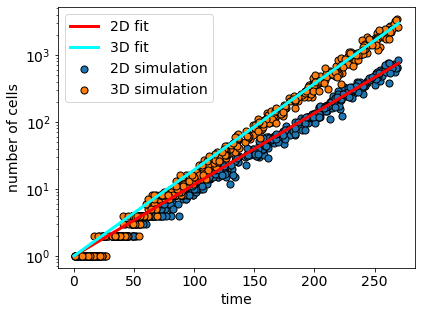

In [266]:
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.scatter(T, nofCells2D, linewidths=1, edgecolors='k', label='2D simulation', s=50)
plt.scatter(T, nofCells3D, linewidths=1, edgecolors='k', label='3D simulation', s=50)

t = np.linspace(0,270,1000)
f = lambda x, a: np.exp(a*x)

popt2D, pcov = curve_fit(f, T, nofCells2D, p0=0.03)
plt.plot(t, f(t,*popt2D), color='r', lw=3, label='2D fit')
popt3D, pcov = curve_fit(f, T, nofCells3D, p0=0.03)
plt.plot(t, f(t,*popt3D), color='cyan', lw=3, label='3D fit')
print(popt2D, popt3D)
plt.legend()
plt.yscale('log')
plt.xlabel('time')
plt.ylabel('number of cells')

plt.savefig('Results/PhD Thesis/Radius pictures/population_growth.png', transparent = True)
plt.savefig('Results/PhD Thesis/Radius pictures/population_growth.pdf', transparent = True)

In [271]:
print(popt2D*24/np.log(2), popt3D*24/np.log(2))

[0.84946592] [1.02523883]


### Division probability

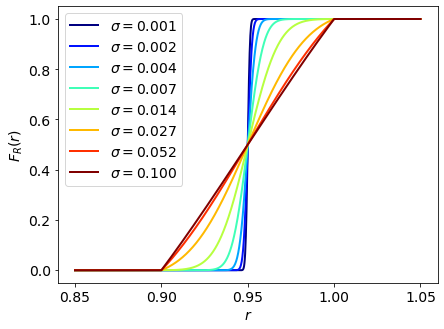

In [346]:
from scipy.special import erf
import matplotlib
                     
def truncated_normal_cdf(x, mu, sigma, interval):
    cdf = lambda y: (1 + erf(y/2**(1/2)))
    
    a = (interval[0] - mu)/sigma           
    b = (interval[1] - mu)/sigma
    z = (x - mu)/sigma
    
    CDF = (cdf(z) - cdf(a)) / (cdf(b) - cdf(a))
    CDF[CDF <= 0] = 0
    CDF[CDF >= 1] = 1
    return CDF

cmap = matplotlib.cm.get_cmap('jet')
N = 8
color_spacing = np.linspace(0,1,N)
x = np.linspace(0.85,1.05,1000)
σ = np.logspace(-3,-1,N)#[0.03, 0.015, 0.09]
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for i in range(N):
    
    rgba = cmap(color_spacing[i])
    
    plt.plot(x, truncated_normal_cdf(x, 0.95, σ[i], [0.9,1]), label="$\\sigma = " + "{:.3f}".format(σ[i]) + "$", lw=2, color=rgba)
    
plt.xlabel('$r$')
plt.xticks([0.85, 0.9, 0.95, 1, 1.05])
plt.ylabel('$F_R(r)$')
plt.legend()

plt.tight_layout()

plt.savefig('Results/PhD Thesis/Radius pictures/division_probability.png', transparent = True)
plt.savefig('Results/PhD Thesis/Radius pictures/division_probability.pdf', transparent = True)

### Thermodynamic model

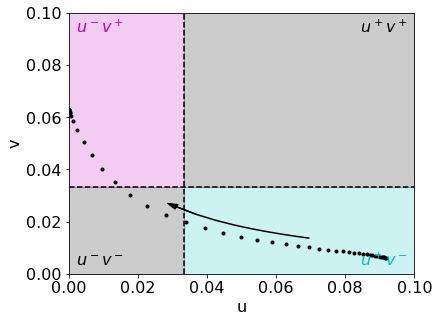

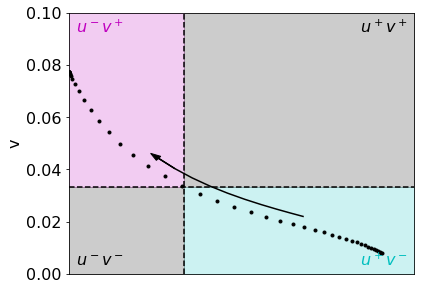

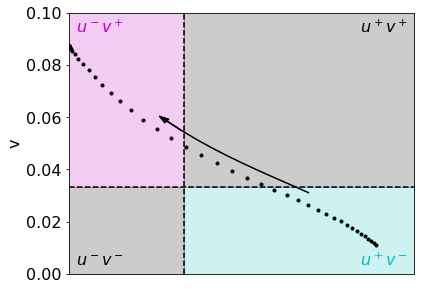

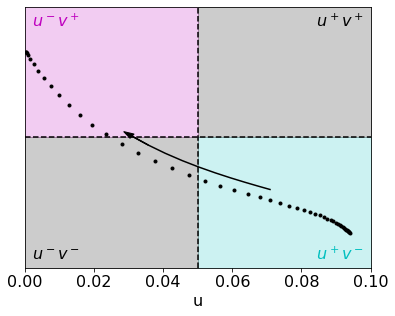

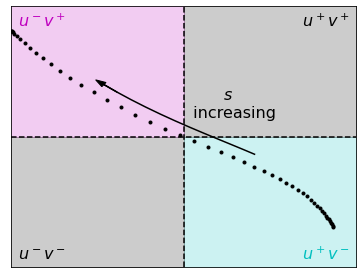

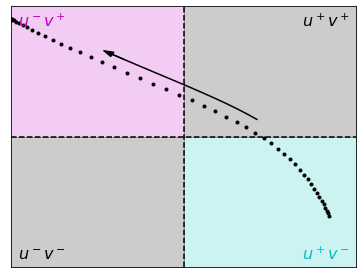

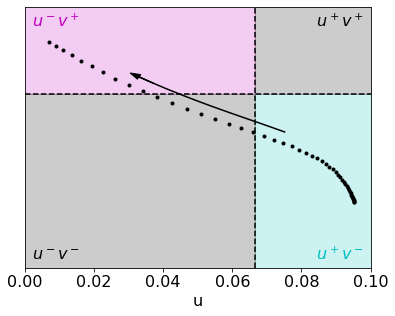

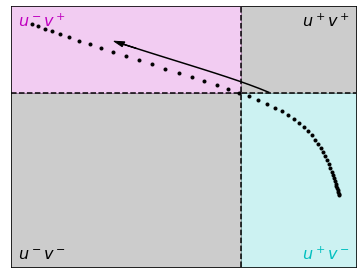

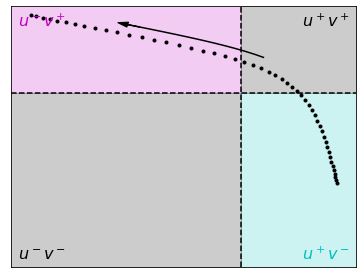

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

γ = 10
r = 1

basal_coeffs = [1/2, 1, 2]
signal_coeffs = [1/2, 1, 2]

for basal_coeff in basal_coeffs:
    for signal_coeff in signal_coeffs:
        x = 1e-1
        eta_x = basal_coeff*1e1

        eta_u = np.exp(5)
        eta_v = np.exp(5)

        eta_ux = np.exp(4)
        eta_vx = np.exp(1)
        
        p = lambda f: eta_x*x/(f + eta_x*x)

        u0 = p(1)*r/γ
        v0 = p(1)*r/γ
        s0 = p(1)*r/γ
        eta_s = ((1 + eta_u*eta_ux*u0)/(1 + eta_u*u0)/(1 + eta_v*v0) - 1)/s0
        eta_sx = signal_coeff*((1 + eta_u*u0)*(1 + eta_v*v0)*(1 + eta_s*s0)/(1 + eta_v*eta_vx*v0) - 1)/(eta_s*s0)

        p = lambda f: eta_x*x/(f + eta_x*x)

        f_u = lambda u, v, s: (1 + eta_u*u)*(1 + eta_v*v)*(1 + eta_s*s)/(1 + eta_u*eta_ux*u)
        f_v = lambda u, v, s: (1 + eta_u*u)*(1 + eta_v*v)*(1 + eta_s*s)/(1 + eta_v*eta_vx*v)/(1 + eta_s*eta_sx*s)

        def F(u, v, s):
            γ = 10
            r = 1

            U = r*p(f_u(u,v,s)) - γ*u
            V = r*p(f_v(u,v,s)) - γ*v

            return U, V

        N = 50
        u = np.empty(N)
        v = np.empty(N)
        for i, s in enumerate(np.logspace(-3,0,N)):
            f = lambda x: F(x[0], x[1], s)
            sol = fsolve(f, [1,1])
            u[i] = sol[0]
            v[i] = sol[1]

        plt.rcParams['font.size'] = 16
        plt.figure(figsize=[6.4, 4.8])
        plt.plot(u, v,'.', color='k', lw=3)
        plt.axhline(r/γ*p(1), color='k', alpha=1, linestyle='dashed')
        plt.axvline(r/γ*p(1), color='k', alpha=1, linestyle='dashed')
        plt.fill_between([0,r/γ*p(1)],[r/γ*p(1), r/γ*p(1)], [.1,.1], color='m', alpha = 0.2)
        plt.fill_between([r/γ*p(1),.1],[0, 0], [r/γ*p(1),r/γ*p(1)], color='c', alpha = 0.2)
        plt.fill_between([r/γ*p(1),.1],[r/γ*p(1),r/γ*p(1)],  [.1,.1], color='k', alpha = 0.2)
        plt.fill_between([0,r/γ*p(1)], [0,0], [r/γ*p(1),r/γ*p(1)], color='k', alpha = 0.2)
        plt.xlim([0, .1])
        plt.ylim([0, .1])
        plt.text(.1 - 0.002, .1 - 0.002, '$u^+v^+$', horizontalalignment='right', verticalalignment='top')
        plt.text(0+0.002, 0+0.002, '$u^-v^-$', horizontalalignment='left', verticalalignment='bottom')
        plt.text(0+0.002, .1-0.002, '$u^-v^+$', color='m', horizontalalignment='left', verticalalignment='top')
        plt.text(0.1-0.002, 0+0.002, '$u^+v^-$', color='c', horizontalalignment='right', verticalalignment='bottom')

        # Plot arrow
        arrow_u = u[(u >= (max(u)+min(u))/2 - (max(u)-min(u))/4) & (u <= (max(u)+min(u))/2 + (max(u)-min(u))/4)]
        arrow_v = v[(u >= (max(u)+min(u))/2 - (max(u)-min(u))/4) & (u <= (max(u)+min(u))/2 + (max(u)-min(u))/4)]
        plt.plot(arrow_u+0.003, arrow_v+0.003, color='k')
        plt.arrow(arrow_u[-2]+0.003, arrow_v[-2]+0.003, arrow_u[-1]-arrow_u[-2], arrow_v[-1]-arrow_v[-2], width=0.0001, head_width=0.002, color='k')
        if basal_coeff == 1 and signal_coeff == 1:
            plt.text(np.mean(arrow_u)+0.005, np.mean(arrow_v)+0.005, '       $s$ \n increasing')

        if basal_coeff == basal_coeffs[0]:
            plt.ylabel('v')
        else:
            plt.yticks([])
        if signal_coeff == signal_coeffs[0]:
            plt.xlabel('u')
        else:
            plt.xticks([])

        plt.gcf().subplots_adjust(left=0.15)
        plt.savefig('Results/PhD Thesis/Transcription pictures/st_states_thermo_eta='+str(signal_coeff)+'_x='+str(basal_coeff)+'.png', transparent = True)
        plt.savefig('Results/PhD Thesis/Transcription pictures/st_states_thermo_eta='+str(signal_coeff)+'_x='+str(basal_coeff)+'.pdf', transparent = True)

In [7]:
eta_s = ((1 + eta_u*eta_ux*u0)/(1 + eta_u*u0)/(1 + eta_v*v0) - 1)/s0
eta_sx = ((1 + eta_u*u0)*(1 + eta_v*v0)*(1 + eta_s*s0)/(1 + eta_v*eta_vx*v0) - 1)/(eta_s*s0)

print(eta_s, eta_sx)
print(np.log(eta_s), np.log(eta_sx))

53.4009294858746 5.168828875573468
3.977828151917185 1.6426461397601957


### Transcriptional regulation model comparison

C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[2.24863494e+00 9.99470470e+00 6.75250344e-02 3.31483377e+02
 4.56741920e+02 1.53995838e+01 1.08060954e+00]
[  0.99861668  10.71905449   7.02003434   7.63396916 941.98056099]


C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


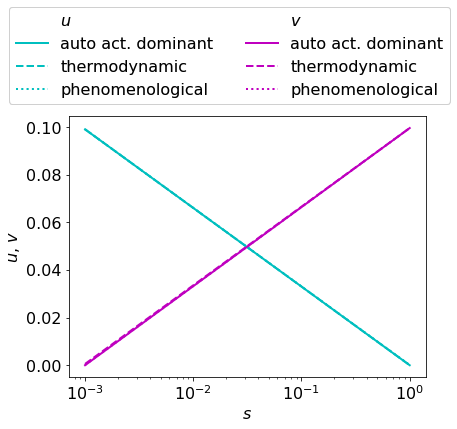

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit

def F_auto_act(s):
    r = 1
    γ = 10

    eta_u = np.exp(7)
    eta_v = np.exp(6)
    eta_s = np.exp(2)
    eta_vs = np.exp(2)

    s_crit = (eta_u - eta_v)/(eta_v*eta_s*eta_vs)
    
    u = r/γ - (1+eta_s*s)/eta_u
    u[s > s_crit] = 0
    v = r/γ - (1+eta_s*s)/eta_v/(1+eta_s*eta_vs*s)
    v[s < s_crit] = 0

    return np.concatenate((u, v))

def F_thermodynamic(s, r, γ, x, eta_u, eta_v, eta_ux, eta_vx):
    #r, γ = 1, 10
    p = lambda f: x/(f + x)
    
    u0 = p(1)*r/γ
    v0 = p(1)*r/γ
    s0 = (np.exp(7) - np.exp(6))/(np.exp(6)*np.exp(2)*np.exp(2))
    
    eta_s = ((1 + eta_u*eta_ux*v0)/(1 + eta_u*u0)/(1 + eta_v*v0) - 1)/s0
    eta_sx = ((1 + eta_u*u0)*(1 + eta_v*v0)*(1 + eta_s*s0)/(1 + eta_v*eta_vx*v0) - 1)/(eta_s*s0)

    f_u = lambda u, v, s: (1 + eta_u*u)*(1 + eta_v*v)*(1 + eta_s*s)/(1 + eta_u*eta_ux*u)
    f_v = lambda u, v, s: (1 + eta_u*u)*(1 + eta_v*v)*(1 + eta_s*s)/(1 + eta_v*eta_vx*v)/(1 + eta_s*eta_sx*s)

    def F(u, v, s):

        x = np.empty(2)
        x[0] = r*p(f_u(u,v,s)) - γ*u
        x[1] = r*p(f_v(u,v,s)) - γ*v

        return x
    
    def dF(u, v, s):
        
        du_fu = (1 - eta_ux)*(1 + eta_v*v)*(1 + eta_s*s) / \
                (1 + eta_u*eta_ux*u)**2
        dv_fu = eta_v*(1 + eta_u*u)*(1 + eta_s*s) / \
                (1 + eta_u*eta_ux*u)
        du_fv = eta_u*(1 + eta_v*v)*(1 + eta_s*s) / \
                (1 + eta_v*eta_vx*v)/(1 + eta_s*eta_sx*s)
        dv_fv = (1 - eta_vx)*(1 + eta_u*u)*(1 + eta_s*s)*(1 + eta_s*eta_sx*s) / \
                (1 + eta_v*eta_vx*v)**2/(1 + eta_s*eta_sx*s)**2
            
        y = np.empty([2, 2])
        y[0,0] = -r*x/(f_u(u,v,s) + x)**2*du_fu - γ
        y[0,1] = -r*x/(f_u(u,v,s) + x)**2*dv_fu
        y[1,0] = -r*x/(f_v(u,v,s) + x)**2*du_fv
        y[1,1] = -r*x/(f_v(u,v,s) + x)**2*dv_fv - γ
        
        return y

    u = np.empty(len(s))
    v = np.empty(len(s))
    for i in range(len(s)):
        f = lambda x: F(x[0], x[1], s[i])
        df = lambda x: dF(x[0], x[1], s[i])
        sol = fsolve(f, [1,1], fprime = df)
        u[i] = sol[0]
        v[i] = sol[1]
    
    return np.concatenate((u, v))

def F_phenomenological(s, r, γ, a_u, a_v, a_s):
    #r, γ = 1, 10
    n = 2

    f_u = lambda u, v, s: r*(a_u*u**n/(1+a_u*u**n) + 1/(1+a_s*s**n))*1/(1+a_v*v**n) - γ*u
    f_v = lambda u, v, s: r*(a_v*v**n/(1+a_v*v**n) + a_s*s**n/(1+a_s*s**n))*1/(1+a_u*u**n) - γ*v

    def F(u, v, s):
        x = np.empty(2)
        x[0] = f_u(u,v,s)
        x[1] = f_v(u,v,s)

        return x
    
    def dF(u, v, s):
        x = np.empty([2,2])
        x[0,0] = r/(1+a_v*v**n)*n*a_u*u**(n-1)/(1 + a_u*u**n)**2 - γ
        x[0,1] = -r*(a_u*u**n/(1+a_u*u**n) + 1/(1+a_s*s**n))*n*a_v*v**(n-1)/(1 + a_v*v**n)**2
        x[1,0] = -r*(a_v*v**n/(1+a_v*v**n) + a_s*s**n/(1+a_s*s**n))*n*a_u*u**(n-1)/(1 + a_u*u**n)**2  
        x[1,1] = r/(1+a_u*u**n)*n*a_v*v**(n-1)/(1 + a_v*v**n)**2 - γ
        
        return x
    
    u = np.empty(len(s))
    v = np.empty(len(s))
    for i in range(len(s)):
        f = lambda x: F(x[0], x[1], s[i])
        df = lambda x: dF(x[0], x[1], s[i])
        sol = fsolve(f, [1,1], fprime=df)
        u[i] = sol[0]
        v[i] = sol[1]
    
    return np.concatenate((u, v))

s = np.logspace(-3,0,2)
y = F_auto_act(s)

popt1, pcov = curve_fit(F_thermodynamic, s, y, p0=[1, 10, 1, np.exp(5), np.exp(5), np.exp(4), np.exp(1)],
                        bounds=(0, [1000, 1000, 1000, 1000, 1000, 1000, 1000]), maxfev=100000)

popt2, pcov = curve_fit(F_phenomenological, s, y, p0=[1, 10, np.exp(2), np.exp(1), np.exp(5)],
                        bounds=(0, 1000), maxfev=10000)

print(popt1)
print(popt2)

x_fit = F_thermodynamic(s, *popt1)
x_fit2 = F_phenomenological(s, *popt2)

plt.rcParams['font.size'] = 16
plt.figure(figsize=[6.4, 4.8])
categories = ['auto act. dominant', 'thermodynamic', 'phenomenological']
p1,=plt.plot(s,y[:len(s)], 'c', lw=2)
p2,=plt.plot(s,y[len(s):], 'm', lw=2)
p3,=plt.plot(s,x_fit[:len(s)], 'c', ls='dashed', lw=2)
p4,=plt.plot(s,x_fit[len(s):], 'm', ls='dashed', lw=2)
p5,=plt.plot(s,x_fit2[:len(s)], 'c', ls='dotted', lw=2)
p6,=plt.plot(s,x_fit2[len(s):], 'm', ls='dotted', lw=2)
p7, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
plt.xscale('log')
plt.xlabel('$s$')
plt.ylabel('$u$, $v$')

leg = plt.legend([p7, p1, p3, p5, p7, p2, p4, p6],
                 [r'$u$'] + categories + [r'$v$'] + categories,
                 ncol=2,
                 loc='upper center', bbox_to_anchor=(0.45, 1.45))
plt.gca().add_artist(leg)
#plt.savefig('Results/PhD Thesis/Transcription pictures/comparison_signal.png', transparent = True, bbox_extra_artists=(leg,), bbox_inches='tight')
#plt.savefig('Results/PhD Thesis/Transcription pictures/comparison_signal.pdf', transparent = True, bbox_extra_artists=(leg,), bbox_inches='tight')

In [135]:
names = ["r", "γ", "x", "eta_u", "eta_v", "eta_ux", "eta_vx"]
for i in range(len(names)):
    if i > 2:
        val = np.log(popt1[i])
    else:
        val = popt1[i]
    print('Thermodynamic parameter '+names[i]+' is {}'.format(val))

names = ["r", "γ", "a_u", "a_v", "a_s"]
for i in range(len(names)):
    if i > 1:
        val = np.log(popt2[i])
    else:
        val = popt2[i]
    print('Phenomenological parameter '+names[i]+' is {}'.format(val))

Thermodynamic parameter r is 2.2486349432488324
Thermodynamic parameter γ is 9.994704698538097
Thermodynamic parameter x is 0.06752503435391237
Thermodynamic parameter eta_u is 5.803577662842923
Thermodynamic parameter eta_v is 6.124118504552268
Thermodynamic parameter eta_ux is 2.734340482435068
Thermodynamic parameter eta_vx is 0.07752527489861184
Phenomenological parameter r is 0.9986166750308795
Phenomenological parameter γ is 10.719054493849574
Phenomenological parameter a_u is 1.9487681103132295
Phenomenological parameter a_v is 2.032607914568969
Phenomenological parameter a_s is 6.847984638474053


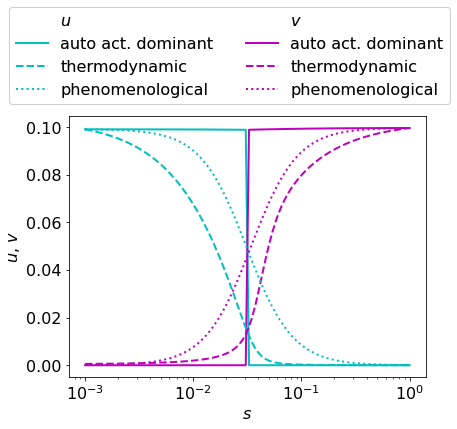

In [133]:
s = np.logspace(-3,0,100)
y = F_auto_act(s)
x_fit = F_thermodynamic(s, *popt1)
x_fit2 = F_phenomenological(s, *popt2)

plt.rcParams['font.size'] = 16
plt.figure(figsize=[6.4, 4.8])
categories = ['auto act. dominant', 'thermodynamic', 'phenomenological']
p1,=plt.plot(s,y[:len(s)], 'c', lw=2)
p2,=plt.plot(s,y[len(s):], 'm', lw=2)
p3,=plt.plot(s,x_fit[:len(s)], 'c', ls='dashed', lw=2)
p4,=plt.plot(s,x_fit[len(s):], 'm', ls='dashed', lw=2)
p5,=plt.plot(s,x_fit2[:len(s)], 'c', ls='dotted', lw=2)
p6,=plt.plot(s,x_fit2[len(s):], 'm', ls='dotted', lw=2)
p7, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
plt.xscale('log')
plt.xlabel('$s$')
plt.ylabel('$u$, $v$')

leg = plt.legend([p7, p1, p3, p5, p7, p2, p4, p6],
                 [r'$u$'] + categories + [r'$v$'] + categories,
                 ncol=2,
                 loc='upper center', bbox_to_anchor=(0.45, 1.45))
plt.gca().add_artist(leg)
plt.savefig('Results/PhD Thesis/Transcription pictures/comparison_signal.png', transparent = True, bbox_extra_artists=(leg,), bbox_inches='tight')
plt.savefig('Results/PhD Thesis/Transcription pictures/comparison_signal.pdf', transparent = True, bbox_extra_artists=(leg,), bbox_inches='tight')

3.1266793963875443 2.4334769372955454 0.03147142947912975
3.1266793963875443 2.4334769372955454 0.03147142947912975


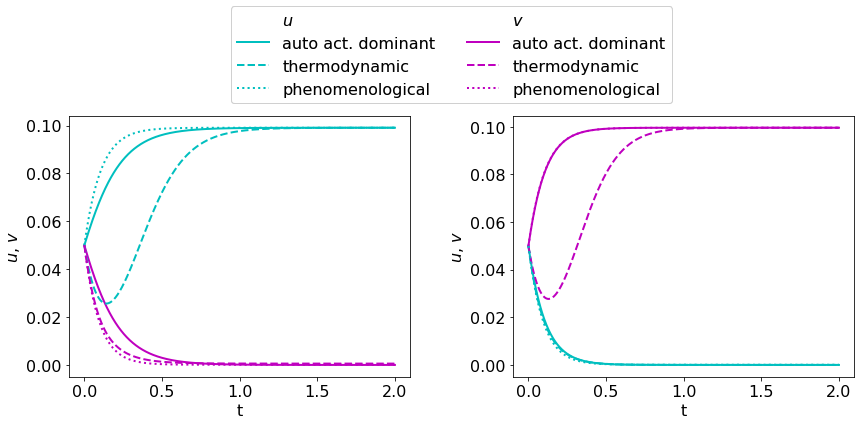

In [142]:
def F_time_auto_act(T, N, s):
    t = np.linspace(0,T,N)
    dt = t[1]-t[0]
    r = 1
    γ = 10

    eta_u = np.exp(7)
    eta_v = np.exp(6)
    eta_s = np.exp(2)
    eta_vs = np.exp(2)

    s_crit = (eta_u - eta_v)/(eta_v*eta_s*eta_vs)
    
    f_u = lambda u, v, s: r*eta_u*u/(1 + eta_u*u + eta_v*v*(1+eta_s*eta_vs*s) + eta_s*s) - γ*u
    f_v = lambda u, v, s: r*eta_v*v*(1+eta_s*eta_vs*s)/(1 + eta_u*u + eta_v*v*(1+eta_s*eta_vs*s) + eta_s*s) - γ*v
    
    u, v = np.empty(N), np.empty(N)
    u[0], v[0] = 0.05, 0.05
    for i in range(N-1):
        u[i+1] = u[i] + dt*f_u(u[i], v[i], s)
        v[i+1] = v[i] + dt*f_v(u[i], v[i], s)

    return t, u, v

def F_time_thermodynamic(T, N, s, r, γ, x, eta_u, eta_v, eta_ux, eta_vx):
    t = np.linspace(0,T,N)
    dt = t[1]-t[0]
    #r, γ = 1, 10
    p = lambda f: x/(f + x)
    
    u0 = p(1)*r/γ
    v0 = p(1)*r/γ
    s0 = (np.exp(7) - np.exp(6))/(np.exp(6)*np.exp(2)*np.exp(2))
    
    eta_s = ((1 + eta_u*eta_ux*v0)/(1 + eta_u*u0)/(1 + eta_v*v0) - 1)/s0
    eta_sx = ((1 + eta_u*u0)*(1 + eta_v*v0)*(1 + eta_s*s0)/(1 + eta_v*eta_vx*v0) - 1)/(eta_s*s0)
    print(np.log(eta_s), np.log(eta_sx), s0)

    f_u = lambda u, v, s: (1 + eta_u*u)*(1 + eta_v*v)*(1 + eta_s*s)/(1 + eta_u*eta_ux*u)
    f_v = lambda u, v, s: (1 + eta_u*u)*(1 + eta_v*v)*(1 + eta_s*s)/(1 + eta_v*eta_vx*v)/(1 + eta_s*eta_sx*s)

    u, v = np.empty(N), np.empty(N)
    u[0], v[0] = 0.05, 0.05
    for i in range(N-1):
        u[i+1] = u[i] + dt*(r*p(f_u(u[i], v[i], s)) - γ*u[i])
        v[i+1] = v[i] + dt*(r*p(f_v(u[i], v[i], s)) - γ*v[i])
        
    return t, u, v

def F_time_phenomenological(T, N, s, r, γ, a_u, a_v, a_s):
    t = np.linspace(0,T,N)
    dt = t[1]-t[0]
    
    n = 2

    f_u = lambda u, v, s: r*(a_u*u**n/(1+a_u*u**n) + 1/(1+a_s*s**n))*1/(1+a_v*v**n) - γ*u
    f_v = lambda u, v, s: r*(a_v*v**n/(1+a_v*v**n) + a_s*s**n/(1+a_s*s**n))*1/(1+a_u*u**n) - γ*v
    
    u, v = np.empty(N), np.empty(N)
    u[0], v[0] = 0.05, 0.05
    for i in range(N-1):
        u[i+1] = u[i] + dt*f_u(u[i], v[i], s)
        v[i+1] = v[i] + dt*f_v(u[i], v[i], s)
        
    return t, u, v


T = 2
N = 1000
s = 1e-3
t, u0, v0 = F_time_auto_act(T, N, s)
t, u1, v1 = F_time_thermodynamic(T, N, s, *popt1)
t, u2, v2 = F_time_phenomenological(T, N, s, *popt2)

plt.rcParams['font.size'] = 16
fig=plt.figure(figsize=[6.4*2.2, 4.8])
plt.subplot(1,2,1)
categories = ['auto act. dominant', 'thermodynamic', 'phenomenological']
p1,=plt.plot(t,u0, 'c', lw=2)
p2,=plt.plot(t,v0, 'm', lw=2)
p3,=plt.plot(t,u1, 'c', ls='dashed', lw=2)
p4,=plt.plot(t,v1, 'm', ls='dashed', lw=2)
p5,=plt.plot(t,u2, 'c', ls='dotted', lw=2)
p6,=plt.plot(t,v2, 'm', ls='dotted', lw=2)
p7, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
plt.xlabel('t')
plt.ylabel('$u$, $v$')

s = 1
t, u0, v0 = F_time_auto_act(T, N, s)
t, u1, v1 = F_time_thermodynamic(T, N, s, *popt1)
t, u2, v2 = F_time_phenomenological(T, N, s, *popt2)

plt.subplot(1,2,2)
categories = ['auto act. dominant', 'thermodynamic', 'phenomenological']
p1,=plt.plot(t,u0, 'c', lw=2)
p2,=plt.plot(t,v0, 'm', lw=2)
p3,=plt.plot(t,u1, 'c', ls='dashed', lw=2)
p4,=plt.plot(t,v1, 'm', ls='dashed', lw=2)
p5,=plt.plot(t,u2, 'c', ls='dotted', lw=2)
p6,=plt.plot(t,v2, 'm', ls='dotted', lw=2)
p7, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
plt.xlabel('t')
plt.ylabel('$u$, $v$')
fig.subplots_adjust(wspace=0.3)
leg = plt.legend([p7, p1, p3, p5, p7, p2, p4, p6],
                 [r'$u$'] + categories + [r'$v$'] + categories,
                 ncol=2,
                 loc='upper center', bbox_to_anchor=(-.18, 1.45))
plt.gca().add_artist(leg)
plt.savefig('Results/PhD Thesis/Transcription pictures/comparison_time.png', transparent = True, bbox_inches='tight')
plt.savefig('Results/PhD Thesis/Transcription pictures/comparison_time.pdf', transparent = True, bbox_inches='tight')

### Cell type proportions

In [12]:
import numpy as np

Λ_2D = 0.0245
Λ_3D = 0.0296

n24 = 441.735294117647
n48 = 1041.2380952380954

t24_2D = np.log(n24)/Λ_2D
t24_3D = np.log(n24)/Λ_3D
t48_3D = np.log(n48)/Λ_3D

print(t24_2D, t24_3D, t48_3D)

248.60044165671098 205.76725745234523 234.73532973888538


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from Organoid import Organoid
import pandas as pd

dim = 2
signal = '0.1'

org = Organoid()
s_max = org.r_N/org.gamma_N
upper_boundary = -org.eps_G + np.log(1 + np.exp(-org.eps_S-org.eps_GS)*s_max)
eps_N = np.linspace(-org.eps_G, upper_boundary, 20)
Ratio = np.empty(eps_N.shape)

N0 = org.r_N/org.gamma_N*3/4
G0 = org.r_G/org.gamma_G*3/4

DF = pd.DataFrame()

nofSim = 1
Ratio = np.empty([len(eps_N), nofSim])
for i in range(len(eps_N)):
    print('\ni =', i)
    print('k =', end=' ')
    for k in range(nofSim):
        org = Organoid()

        # Geometry construction
        org.evolution(T = t48_3D, dim=dim, ignore=['transcription'])

        # Transcriptional regulation
        org.eps_N = -eps_N[i]
        org.u = np.append(np.random.normal(N0, N0*0.01, org.nofCells),
                          np.random.normal(G0, G0*0.01, org.nofCells))
        org.N = org.u[:org.nofCells]
        org.G = org.u[org.nofCells:]
        if signal == 'NN':
            org.signal = 'neighbor'
        else:
            org.q = float(signal)
            org.signal = 'dispersion'
        org.evolution(T = 100, dim=dim, ignore=['displacement', 'growth', 'division'])
        F = [1 if org.G[i] >= org.N[i] else 0 for i in range(org.nofCells)]
        Ratio[i,k] = np.sum(F)/org.nofCells
        print(k, end=' ')
        
        df = pd.DataFrame()
        df['ID'] = (i*nofSim + k)*np.ones(org.nofCells, dtype=int)
        df['eps_N'] = eps_N[i]*np.ones(org.nofCells)
        df['x-Position'] = org.pos[:,0]
        df['y-Position'] = org.pos[:,1]
        if dim == 3:
            df['z-Position'] = org.pos[:,2]
        df['Radius'] = org.r
        df['Fate'] = F
        
        DF = DF.append(df)
        
DF.to_csv('Results/PhD Thesis/Cell type proportions/'+str(dim)+'D_'+signal+'.csv', index=False)


i = 0
k = 0 
i = 1
k = 0 
i = 2
k = 0 
i = 3
k = 0 
i = 4
k = 0 
i = 5
k = 0 
i = 6
k = 0 
i = 7
k = 0 
i = 8
k = 0 
i = 9
k = 0 

Organoids have around 314.4485 +/- 45.66029762429905 cells
314.4485 45.66029762429905


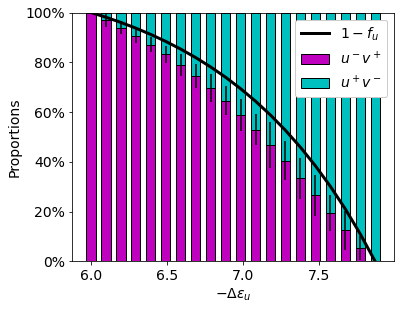

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from Organoid import Organoid
import pandas as pd

dim = 2
signal = '0.9'

η_u = np.exp(-org.eps_N)
η_v = np.exp(-org.eps_G)
η_s = np.exp(-org.eps_GS)
η_vs = np.exp(-org.eps_S)

f = lambda x: 100*10*(np.exp(x) - η_v)/(η_v*η_s*η_vs)

Data = pd.read_csv('Results/PhD Thesis/Cell type proportions/'+str(dim)+'D_'+signal+'.csv')

mean = Data.groupby(['ID', 'eps_N']).mean().reset_index()
std = mean.groupby(['eps_N']).std().reset_index()
prop = mean.groupby(['eps_N']).mean().reset_index()
size = Data.groupby(['ID']).size().reset_index()

print('Organoids have around', size.mean()[0], '+/-', size.std()[0], 'cells')
print(size.mean()[0], size.std()[0])


plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.bar(Data.eps_N.unique(), prop.Fate*100, yerr=std.Fate*1000, 
        width=0.06, color = 'm', edgecolor='k', alpha = 1, label='$u^-v^+$')
plt.bar(Data.eps_N.unique(), (1-prop.Fate)*100, bottom=prop.Fate*100,
        width=0.06, color = 'c', edgecolor='k', alpha = 1, label='$u^+v^-$')
ticks = [0,20,40,60,80,100]
plt.yticks(ticks, [str(x)+'%' for x in ticks])
plt.xlabel('$-\Delta\epsilon_u$')
plt.ylabel('Proportions')
plt.gcf().subplots_adjust(bottom=0.16)
plt.gcf().subplots_adjust(left=0.2)

plt.plot(Data.eps_N.unique(), 100-f(Data.eps_N.unique()), color='k', lw=3, label='$1-f_u$')
plt.legend(framealpha=1, fontsize=14)
plt.ylim([0,100])
plt.savefig('Results/PhD Thesis/Cell type proportions/'+str(dim)+'D_'+signal+'.png', transparent = True)
plt.savefig('Results/PhD Thesis/Cell type proportions/'+str(dim)+'D_'+signal+'.pdf', transparent = True)

In [143]:
max(std.Fate)*100

2.35417800880502

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from Organoid import Organoid
import pandas as pd

dim = 3
signal = 'NN'

Data = pd.read_csv('Results/PhD Thesis/Cell type proportions/'+str(dim)+'D_'+signal+'.csv')

N_mean = 0
N_max = 0
N_min = 100
for ID in Data.ID.unique():
    print(ID, end=' ')
    organoid = Data[Data.ID == ID]
    organoid.to_csv('test.csv', index = False)

    org = Organoid()
    org.nofSteps = 2
    org.evolution(T = 0, file='test.csv', dim=dim, ignore=['division', 'displacement'])

    adjacency = org.GraphDist.copy()
    adjacency[adjacency > 1] = 0
    neighbors = adjacency.sum(1)
    
    N_mean += neighbors.mean()/len(Data.ID.unique())
    N_max = max(neighbors.max(), N_max)
    N_min = min(neighbors.min(), N_min)

print('The '+str(dim)+'D_'+signal+' organoids have a mean of', N_mean, 'neighbors')
print('The '+str(dim)+'D_'+signal+' organoids have a maximum of', N_max, 'neighbors')
print('The '+str(dim)+'D_'+signal+' organoids have a minimum of', N_min, 'neighbors')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 The 3D_NN organoids have a mean of 12.801354975267968 neighbors
The 3D_NN organoids have a maximum of 23.0 neighbors
The 3D_NN organoids have a minimum of 1.0 neighbors


### Pattern formation

In [8]:
from Organoid import Organoid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Λ_3D = 0.0296

n48 = 1041.2380952380954
t48_3D = np.log(n48)/Λ_3D

org = Organoid()
org.evolution(T=t48_3D, dim=2, ignore=['transcription'])
#org.cellPlot(radius='mean')
#org.saveData(directory='Results/PhD pattern/')

200 102 302


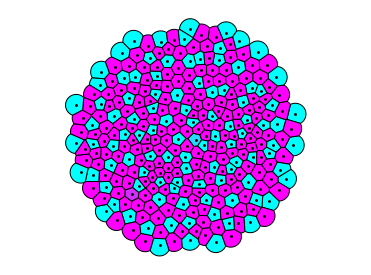

In [71]:
signal = '0.1'

org = Organoid()
org.eps_N = - 6.6
if signal == 'NN':
    org.signal = 'neighbor'
else:
    org.signal = 'dispersion'
    org.q = float(signal)
    
org.nofSteps = 5000
org.evolution(T=500, dim=2, file='Results/PhD pattern/Data.csv', ignore=['division', 'displacement'])
print(len(org.G[org.G > org.N]), org.nofCells-len(org.G[org.G > org.N]), org.nofCells)
plt.figure(figsize=[6.4, 4.8])
org.cellPlot(org.G, radius = 'mean')
#plt.savefig('Results/PhD Thesis/Pattern formation/'+str(signal)+'_eps_u='+str(-org.eps_N)+'.png', transparent = True) 
#plt.savefig('Results/PhD Thesis/Pattern formation/'+str(signal)+'_eps_u='+str(-org.eps_N)+'.pdf', transparent = True)

In [135]:
def pcf(N, G, GraphDist):
    x = np.zeros(len(N))
    x[N > G] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P

Pu = []
Pv = []
Tu = []
Tv = []
eps_N_list = []
moran_list = []
eps_N = np.linspace(-6,-7.86,12)
for i in range(10):
    print(i, end=' ')
    org = Organoid()
    org.eps_N = eps_N[i+1]
    org.signal='neighbor'
    org.nofSteps = 1000
    org.evolution(T=100, file = 'Results/PhD pattern/Data.csv', ignore=['division', 'displacement'])
    org.moran()
    
    Tu.append(len(org.N[org.N>org.G]))
    Tv.append(len(org.G[org.G>org.N]))

    Pu.append(pcf(org.N, org.G, org.GraphDist))
    Pv.append(pcf(org.G, org.N, org.GraphDist))
    eps_N_list.append(eps_N)
    moran_list.append(org.Morans_I)

0 1 2 3 4 5 6 7 8 9 

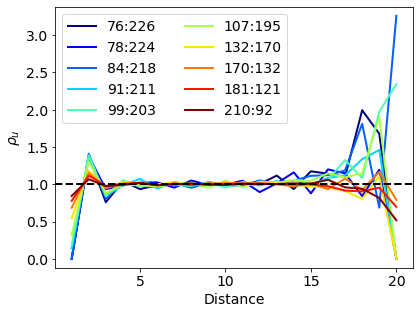

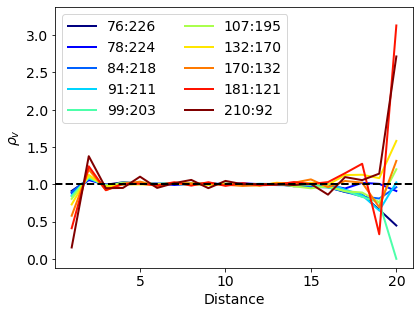

In [137]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')
test = np.linspace(0,1,len(Pu))
distances = [j for j in range(1,int(np.max(org.GraphDist))+1)]
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)

for i in range(len(Pu)):
    rgba = cmap(test[i])
    
    plt.plot(distances,Pu[i], color = rgba, lw=2, label=str(Tu[i])+':'+str(Tv[i]))
    
plt.axhline(1, color='k', ls = 'dashed', lw = 2)
plt.legend(ncol=2)    
plt.xlabel('Distance')
plt.ylabel('$\\rho_u$')
plt.ylim([0-0.12, max([np.max(Pv), np.max(Pu)])+0.12])
plt.savefig('Results/PhD Thesis/Pattern formation/NN_PCF_u.pdf', transparent=True)
plt.savefig('Results/PhD Thesis/Pattern formation/NN_PCF_u.png', transparent=True)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for i in range(len(Pv)):
    rgba = cmap(test[i])
    
    plt.plot(distances,Pv[i], color = rgba, lw=2, label=str(Tu[i])+':'+str(Tv[i]))

plt.axhline(1, color='k', ls = 'dashed', lw = 2)
plt.legend(ncol=2)
plt.xlabel('Distance')
plt.ylabel('$\\rho_v$')
plt.ylim([0-0.12, max([np.max(Pu), np.max(Pv)])+0.12])
#sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
#cbar = plt.colorbar(sm)
#cbar.ax.set_yticklabels([])
#cbar.set_label('$-\Delta\epsilon_g$')
plt.savefig('Results/PhD Thesis/Pattern formation/NN_PCF_v.pdf', transparent=True)
plt.savefig('Results/PhD Thesis/Pattern formation/NN_PCF_v.png', transparent=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Organoid import Organoid
import pandas as pd

signals = ['0.1', '0.5', '0.9']
I = np.empty([100,20,len(signals)])
dim = 3

for k in range(len(signals)):
    signal = signals[k]

    Data = pd.read_csv('Results/PhD Thesis/Cell type proportions/'+str(dim)+'D_'+signal+'.csv')

    for ID in Data.ID.unique():
        if ID % 25 == 0:
            print(ID, end=' ')
            
        organoid = Data[Data.ID == ID]
        organoid.to_csv('test.csv', index = False)

        org = Organoid()
        org.nofSteps = 2
        org.evolution(T = 0, file='test.csv', dim=dim, ignore=['division', 'displacement'])
        org.G = organoid.Fate.to_numpy()
        org.N = 1-org.G

        i = int(ID) % 100
        j = int(int(ID)/100)
        org.moran()
        I[i,j,k] = org.Morans_I

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Organoid import Organoid
import pandas as pd

I = np.empty([100,20,2])

for k in range(2):
    signal = 'NN'
    dim = k+2
    Data = pd.read_csv('Results/PhD Thesis/Cell type proportions/'+str(dim)+'D_'+signal+'.csv')

    for ID in Data.ID.unique():
        if ID % 25 == 0:
            print(ID, end=' ')
            
        organoid = Data[Data.ID == ID]
        organoid.to_csv('test.csv', index = False)

        org = Organoid()
        org.nofSteps = 2
        org.evolution(T = 0, file='test.csv', dim=dim, ignore=['division', 'displacement'])
        org.G = organoid.Fate.to_numpy()
        org.N = 1-org.G

        i = int(ID) % 100
        j = int(int(ID)/100)
        org.moran()
        I[i,j,k] = org.Morans_I

In [ ]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')
test = np.linspace(0,1,4)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for k in range(2):
    rgba = list(cmap(test[k+1]))
    rgba[-1] = .3
    p=plt.violinplot(I[:,:,k], positions=Data.eps_N.unique(), widths= 0.075, showextrema=False);

    for pc in p['bodies']:
        pc.set_facecolor(rgba)
        pc.set_edgecolor('black')
        pc.set_alpha(rgba[-1])

    quartile1, medians, quartile3 = np.percentile(I[:,:,k], [25, 50, 75], axis=1)
    plt.hlines(np.median(I[:,:,k], axis=0), Data.eps_N.unique()-.025, Data.eps_N.unique()+.025, color='k')
    
for k in range(2):
    rgba = list(cmap(test[k+1]))
    rgba[-1] = .3
    plt.fill_between([7],[-0.1],[-0.1], color=rgba, label=str(k+2)+'D')
    
plt.legend()
plt.xlabel('$-\Delta\epsilon_u$')
plt.ylabel('Moran\'s I')
plt.tight_layout()
plt.savefig('Results/PhD Thesis/Pattern formation/NN_Morans.pdf', transparent=True)
plt.savefig('Results/PhD Thesis/Pattern formation/NN_Morans.png', transparent=True)

In [ ]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')
test = np.linspace(0,1,len(signals)+2)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for k in range(len(signals)):
    rgba = list(cmap(test[k+1]))
    rgba[-1] = .3
    p=plt.violinplot(I[:,:,k], positions=Data.eps_N.unique(), widths= 0.075, showextrema=False);

    for pc in p['bodies']:
        pc.set_facecolor(rgba)
        pc.set_edgecolor('black')
        pc.set_alpha(rgba[-1])

    quartile1, medians, quartile3 = np.percentile(I[:,:,k], [25, 50, 75], axis=1)
    plt.hlines(np.median(I[:,:,k], axis=0), Data.eps_N.unique()-.025, Data.eps_N.unique()+.025, color='k')
    
for k in range(len(signals)):
    rgba = list(cmap(test[k+1]))
    rgba[-1] = .3
    plt.fill_between([7],[0], color=rgba, label='$q = '+str(signals[k])+'$')
    
plt.legend(loc='upper left')
plt.xlabel('$-\Delta\epsilon_u$')
plt.ylabel('Moran\'s I')
#plt.savefig('Results/PhD Thesis/Pattern formation/q_Morans_'+str(dim)+'D.pdf', transparent=True)
#plt.savefig('Results/PhD Thesis/Pattern formation/q_Morans_'+str(dim)+'D.png', transparent=True)

In [91]:
from Organoid import Organoid
import matplotlib.pyplot as plt
import numpy as np

def pcf(N, G, GraphDist):
    x = np.zeros(len(N))
    x[N > G] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P

Pu = []
Pv = []
eps_N_list = []
ratio = 151/302
moran_list = []

for i in range(10):
    r = 0
    k = 0
    lower_boundary = -6
    upper_boundary = -7.86
    eps_N = (lower_boundary+upper_boundary)/2
    while r != ratio:
        org = Organoid()
        org.eps_N = eps_N
        org.signal = 'dispersion'
        org.q = 0.1*i
        org.nofSteps=30000
        org.evolution(T=2000, file = 'Results/PhD pattern/Data.csv', ignore=['displacement', 'division'])
        org.moran()
        F = [1 if org.G[i] >= org.N[i] else 0 for i in range(len(org.N))]
        r = sum(F)/len(F)
        k += 1
        print('Iteration: '+str(k)+' Ratio: '+str(r)+' Current eps_N: '+str(eps_N))
        
        if r > ratio:
            lower_boundary = eps_N
        elif r < ratio:
            upper_boundary = eps_N
            
        eps_N = (lower_boundary+upper_boundary)/2

    Pu.append(pcf(org.N, org.G, org.GraphDist))
    Pv.append(pcf(org.G, org.N, org.GraphDist))
    eps_N_list.append(eps_N)
    moran_list.append(org.Morans_I)
    
print('Finished!')

Iteration: 1 Ratio: 0.5099337748344371 Current eps_N: -6.93
Iteration: 2 Ratio: 0.2847682119205298 Current eps_N: -7.395
Iteration: 3 Ratio: 0.3741721854304636 Current eps_N: -7.1625
Iteration: 4 Ratio: 0.5099337748344371 Current eps_N: -7.04625
Iteration: 5 Ratio: 0.5066225165562914 Current eps_N: -7.104374999999999
Iteration: 6 Ratio: 0.37748344370860926 Current eps_N: -7.133437499999999
Iteration: 7 Ratio: 0.37748344370860926 Current eps_N: -7.118906249999999
Iteration: 8 Ratio: 0.37748344370860926 Current eps_N: -7.111640625
Iteration: 9 Ratio: 0.4271523178807947 Current eps_N: -7.1080078124999995
Iteration: 10 Ratio: 0.5099337748344371 Current eps_N: -7.10619140625
Iteration: 11 Ratio: 0.5066225165562914 Current eps_N: -7.107099609375
Iteration: 12 Ratio: 0.49337748344370863 Current eps_N: -7.1075537109375
Iteration: 13 Ratio: 0.5066225165562914 Current eps_N: -7.10732666015625
Iteration: 14 Ratio: 0.5099337748344371 Current eps_N: -7.107440185546875
Iteration: 15 Ratio: 0.5 Curre

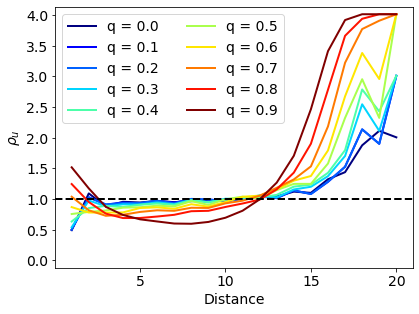

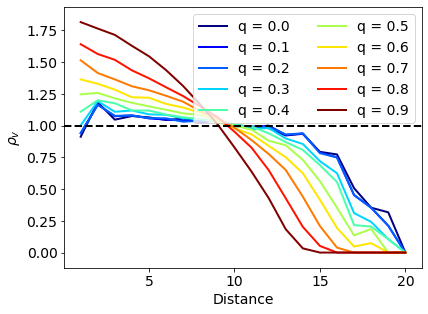

In [98]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')
test = np.linspace(0,1,len(Pu))
distances = [j for j in range(1,int(np.max(org.GraphDist))+1)]
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)

for i in range(len(Pu)):
    rgba = cmap(test[i])
    
    plt.plot(distances,Pu[i], color = rgba, lw=2, label='q = 0.'+str(i))
    
plt.axhline(1, color='k', ls = 'dashed', lw = 2)
plt.legend(ncol=2)    
plt.xlabel('Distance')
plt.ylabel('$\\rho_u$')
plt.ylim([0-0.12, max([np.max(Pu), np.max(Pv)])+0.12])
plt.savefig('Results/PhD Thesis/Pattern formation/q_PCF_u.pdf', transparent=True)
plt.savefig('Results/PhD Thesis/Pattern formation/q_PCF_u.png', transparent=True)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for i in range(len(Pv)):
    rgba = cmap(test[i])
    
    plt.plot(distances,Pv[i], color = rgba, lw=2, label='q = 0.'+str(i))

plt.axhline(1, color='k', ls = 'dashed', lw = 2)
plt.legend(ncol=2, loc='upper right')
plt.xlabel('Distance')
plt.ylabel('$\\rho_v$')
plt.ylim([0-0.12, max([np.max(Pv), np.max(Pv)])+0.12])
#sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
#cbar = plt.colorbar(sm)
#cbar.ax.set_yticklabels([])
#cbar.set_label('$-\Delta\epsilon_g$')
plt.savefig('Results/PhD Thesis/Pattern formation/q_PCF_v.pdf', transparent=True)
plt.savefig('Results/PhD Thesis/Pattern formation/q_PCF_v.png', transparent=True)

### Experimental results

### Cell differentiation timing

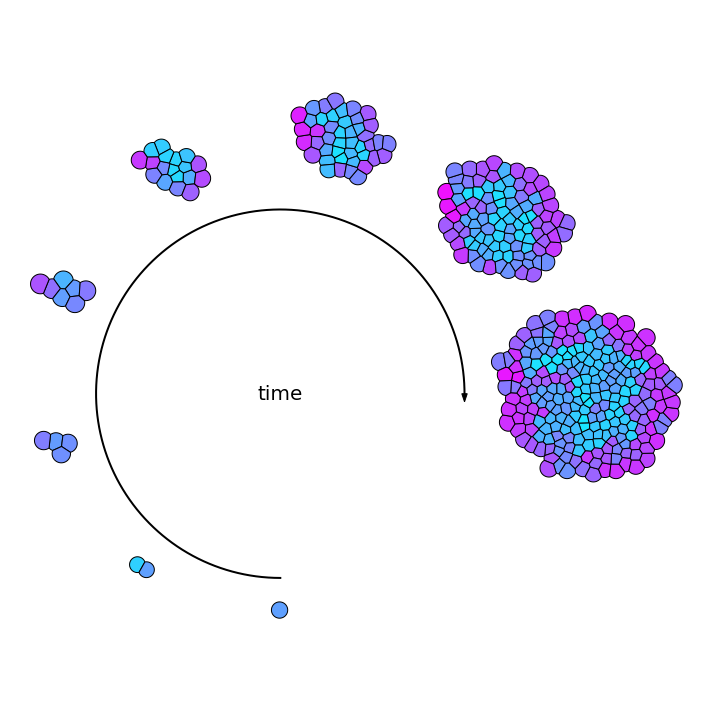

In [17]:
from Organoid import Organoid
import matplotlib.pyplot as plt
import numpy as np

Λ_3D = 0.0296
n48 = 1041.2380952380954
t48_3D = np.log(n48)/Λ_3D

for tau in [0.01,0.05,0.1,1]:
    org = Organoid()
    org.signal = 'dispersion'
    org.q = 0.5
    org.tau = tau
    org.eps_N = -7

    if org.signal == 'neighbor':
        name = 'NN_tau=' + str(org.tau)
    else:
        name = 'q=' + str(org.q) + '_tau=' + str(org.tau)

    org.evolution(T=t48_3D, dim=2)

    # Plot the result
    plt.figure(figsize=(10,10))
    org.circularPlot(TF='GATA6', nofPlots=8, bounds=[0,0.1], radius='mean', size=0)
    plt.tight_layout()
    plt.savefig('Results/PhD Thesis/Cell division/'+name+'.pdf', transparent=True)
    plt.savefig('Results/PhD Thesis/Cell division/'+name+'.png', transparent=True)

### Cell division vs. static Moran's I

#### Division data

In [11]:
from Organoid import Organoid
import numpy as np
import matplotlib.pyplot as plt
import csv

Λ_3D = 0.0296
n48 = 1041.2380952380954
t48_3D = np.log(n48)/Λ_3D

signal = 'NN'
dim = 2

#with open('C:/Users/sis85wc/Desktop/Cell-Differentiation/Results/PhD Thesis/Cell division/'+signal+'_'+str(dim)+'D.csv','w') as f1:
#    writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
#    writer.writerow(['ID', 'x-Position', 'y-Position', 'z-Position', 'Radius', 'N', 'G', 'q'])
#
#    for i in range(1000):
#        org = Organoid()
#        if signal == 'NN':
#            org.signal = 'neighbor'
#        elif signal == 'q':
#            org.signal = 'dispersion'
#            org.q = np.random.uniform(0,1)
#            
#        org.eps_N = -np.random.uniform(6.,7.6)
#        org.evolution(T=t48_3D, dim=dim)
#
#        print('ID =', i, 'Total =', org.nofCells, 'NANOG =', len(org.N[org.N>org.G]), 'GATA6 =', len(org.G[org.G>org.N]), 'q =', org.q)
#
#        for j in range(org.nofCells):
#            if dim == 3:
#                row = [i, org.pos[j,0], org.pos[j,1], org.pos[j,2], org.r[j], org.N[j], org.G[j], org.q]
#            elif dim == 2:
#                row = [i, org.pos[j,0], org.pos[j,1], org.r[j], org.N[j], org.G[j], org.q]
#            writer.writerow(row)

In [394]:
import numpy as np
import matplotlib.pyplot as plt
from Organoid import Organoid
import pandas as pd

I_div = np.empty([100,18,4])
I_sta = np.empty([100,20,4])

dim = 2

signals = ['NN', '0.1', '0.5', '0.9']

for k in range(4):
    signal = signals[k]

    Data_sta = pd.read_csv('Results/PhD Thesis/Cell type proportions/'+str(dim)+'D_'+signal+'.csv')
    Data_div = pd.read_csv('Results/PhD Thesis/Cell division/'+signal+'_'+str(dim)+'D.csv')

    for ID in Data_sta.ID.unique():
            if ID % 25 == 0:
                print(ID, end=' ')

            organoid = Data_sta[Data_sta.ID == ID]
            organoid.to_csv('test.csv', index = False)

            org = Organoid()
            org.nofSteps = 2
            org.evolution(T = 0, file='test.csv', ignore=['division', 'displacement'])
            org.G = organoid.Fate.to_numpy()
            org.N = 1-org.G

            i = int(ID) % 100
            j = int(int(ID)/100)
            org.moran()
            I_sta[i,j,k] = org.Morans_I

    for ID in Data_div.ID.unique():
        if ID % 25 == 0:
            print(ID, end=' ')

        organoid = Data_div[Data_div.ID == ID]
        organoid.to_csv('test.csv', index = False)

        org = Organoid()
        org.nofSteps = 2
        org.evolution(T = 0, file='test.csv', ignore=['division', 'displacement'])
        org.G = organoid.G
        org.N = organoid.N

        i = int(ID) % 100
        j = int(int(ID)/100)
        org.moran()
        if org.Morans_I != org.Morans_I:
            print('ID=', ID)
        I_div[i,j,k] = org.Morans_I

0 25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 0 ID= 17
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 0 25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 182

In [395]:
def replacenan(I):
    for i in range(I.shape[1]):
        for k in range(I.shape[2]):
            print(np.sum(np.isnan(I[:,i,k])), end=' ')
            I[np.isnan(I[:,i,k]),i] = np.nanmean(I[:,i,k])

    return I

I_div = replacenan(I_div)

1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 100 100 100 

C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


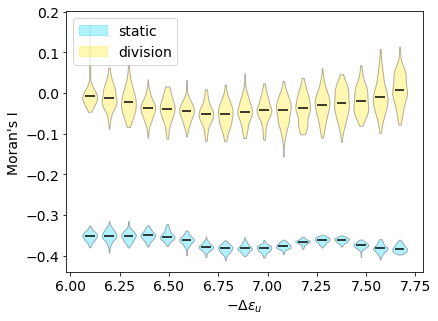

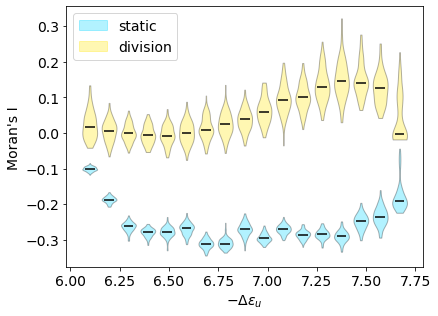

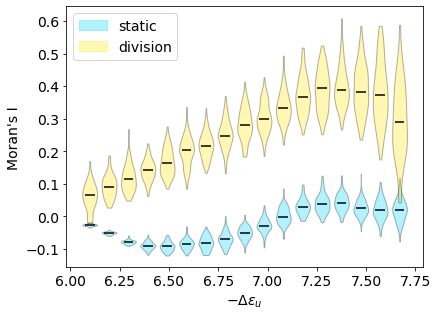

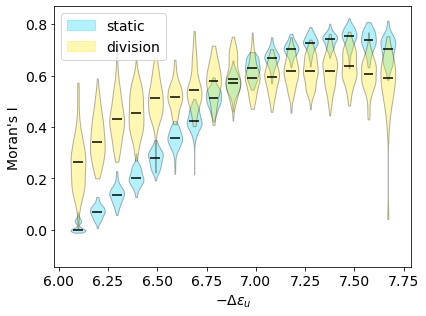

In [408]:
import matplotlib

K = I_sta.shape[2]
cmap = matplotlib.cm.get_cmap('jet')
test = np.linspace(0,1,4)

org = Organoid()
s_max = org.r_N/org.gamma_N
upper_boundary = -org.eps_G + np.log(1 + np.exp(-org.eps_S-org.eps_GS)*s_max)
eps_N = np.linspace(-org.eps_G, upper_boundary, 20)


for k in range(K):
    plt.figure(figsize=[6.4, 4.8])
    plt.rc('font', size=14)

    rgba = list(cmap(test[1]))
    rgba[-1] = .3
    p=plt.violinplot(I_sta[:,1:-2,k], positions=eps_N[1:-2], widths= 0.075, showextrema=False);
    plt.fill_between([7],[-0.1],[-0.1], color=rgba, label='static')
    for pc in p['bodies']:
        pc.set_facecolor(rgba)
        pc.set_edgecolor('black')
        pc.set_alpha(rgba[-1])

    rgba = list(cmap(test[2]))
    rgba[-1] = .3
    p=plt.violinplot(I_div[:,:-1,k], positions=eps_N[1:-2], widths= 0.075, showextrema=False);
    plt.fill_between([7],[-0.1],[-0.1], color=rgba, label='division')
    for pc in p['bodies']:
        pc.set_facecolor(rgba)
        pc.set_edgecolor('black')
        pc.set_alpha(rgba[-1])

    plt.hlines(np.median(I_sta[:,1:-2,k], axis=0), eps_N[1:-1]-.025, eps_N[1:-1]+.025, color='k')

    plt.hlines(np.median(I_div[:,:-1,k], axis=0), eps_N[1:-1]-.025, eps_N[1:-1]+.025, color='k')
    
    plt.legend(loc='upper left')
    plt.xlabel('$-\Delta\epsilon_u$')
    plt.ylabel('Moran\'s I')

    plt.savefig('Results/PhD Thesis/Cell division/'+signals[k]+'_'+str(dim)+'D_Morans.pdf', transparent=True)
    plt.savefig('Results/PhD Thesis/Cell division/'+signals[k]+'_'+str(dim)+'D_Morans.png', transparent=True)

### Cell division vs static pattern formation

C:\Users\sis85wc\Desktop\Cell-Differentiation\Organoid.py:531: RuntimeWarning: invalid value encountered in double_scalars
  self.pcf_N[i-1] = len(dist_N[dist_N==i])/len(GraphDist[GraphDist==i])/rho_N


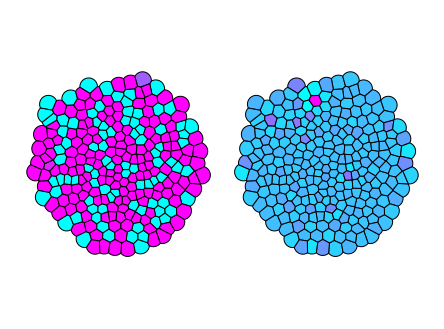

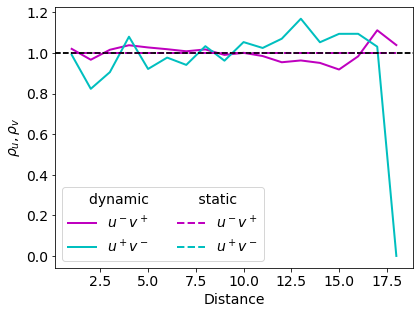

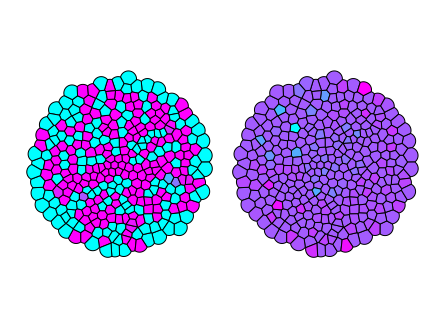

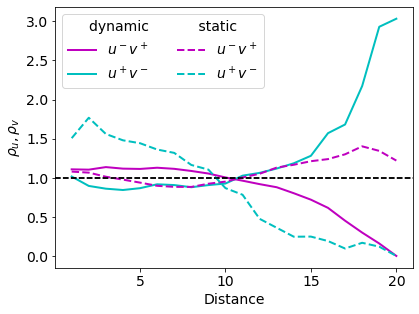

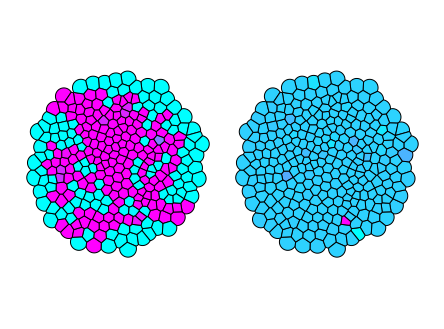

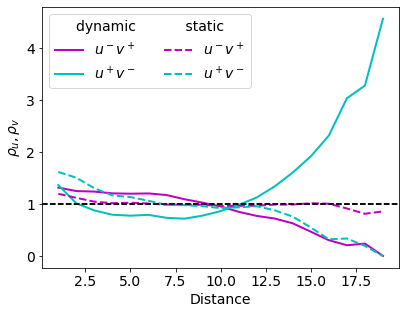

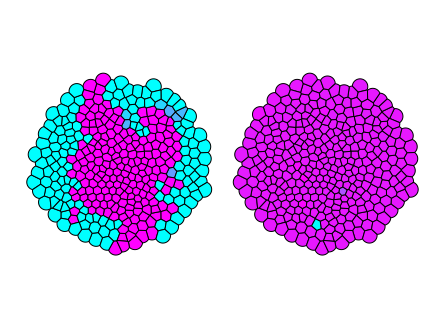

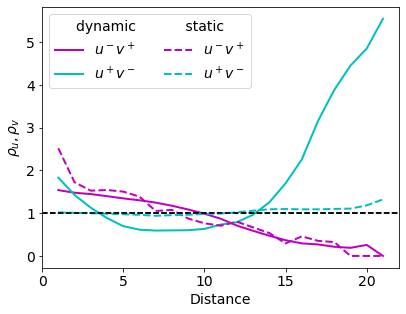

In [6]:
from Organoid import Organoid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Λ_3D = 0.0296
n48 = 1041.2380952380954
t48_3D = np.log(n48)/Λ_3D

signals = ['NN', '0.1', '0.5', '0.9']

for i in range(len(signals)):
    plt.figure(figsize=[6.4, 4.8])
    org1 = Organoid()
    if signals[i] == 'NN':
        org1.signal = 'neighbor'
    else:
        org1.signal = 'dispersion'
        org1.q = float(signals[i])
    org1.eps_N = -7
    org1.evolution(T=np.log(n48)/Λ_3D)
    org1.saveData(directory='Results/Cell Fate/', plot=False)

    org2 = Organoid()
    if signals[i] == 'NN':
        org2.signal = 'neighbor'
    else:
        org2.signal = 'dispersion'
        org2.q = float(signals[i])
    org2.eps_N = -7
    org2.evolution(T=1000, file = 'Results/Cell Fate/Data.csv', ignore=['division', 'displacement'])
    
    
    
    dist = np.max(org1.dist)
    org2.pos += np.array([dist*1.2,0])
    org1.cellPlot(org1.G, size=0, radius='mean')
    org2.cellPlot(org2.G, size=0, radius='mean')
    plt.tight_layout()
    
    plt.savefig('Results/PhD Thesis/Cell division/'+signals[i]+'_static_vs_division.pdf', transparent=True)
    plt.savefig('Results/PhD Thesis/Cell division/'+signals[i]+'_static_vs_division.png', transparent=True)
    
    plt.figure(figsize=[6.4, 4.8])
    org1.pcf()
    org2.pcf(ls='dashed')
    plt.legend(['$u^-v^+$', '$u^+v^-$', '$u^-v^+$', '$u^+v^-$'], title = 'dynamic           static', ncol=2)
    
    plt.savefig('Results/PhD Thesis/Cell division/'+signals[i]+'_static_vs_division_PCF.pdf', transparent=True)
    plt.savefig('Results/PhD Thesis/Cell division/'+signals[i]+'_static_vs_division_PCF.png', transparent=True)

### Cell division - number of divisions quantification

In [1]:
from Organoid import Organoid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Λ_2D = 0.0245
Λ_3D = 0.0296
n48 = 1041.2380952380954
t48_3D = np.log(n48)/Λ_3D

t_div_2D = np.log(2)/Λ_2D
t_div_3D = np.log(2)/Λ_3D

-0.07634984381972335
-0.1170208897897679
-0.07745132470195648
-0.15584682396342495


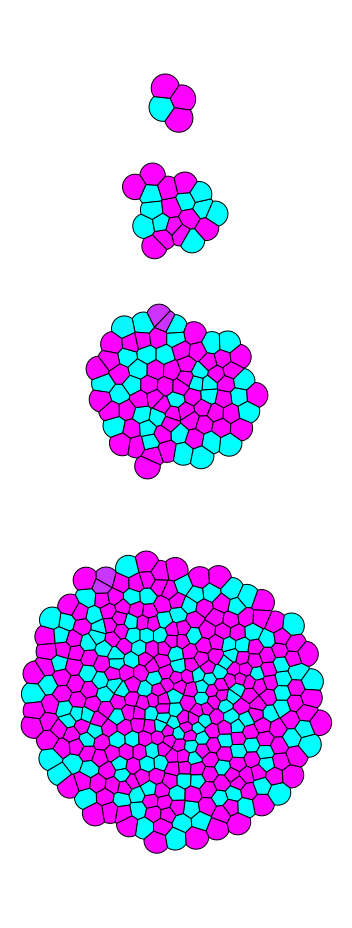

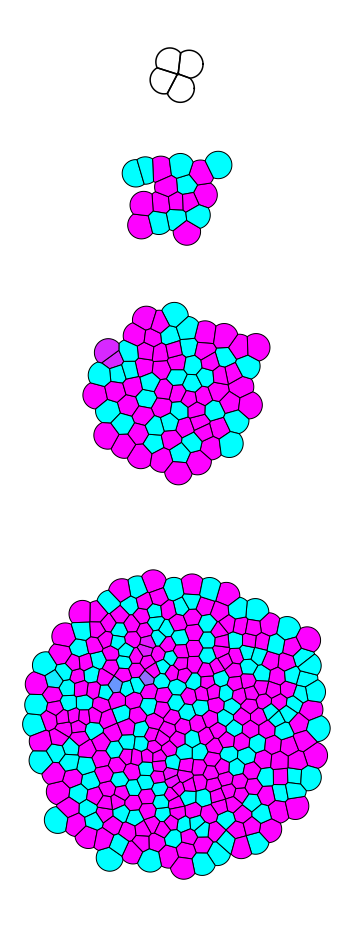

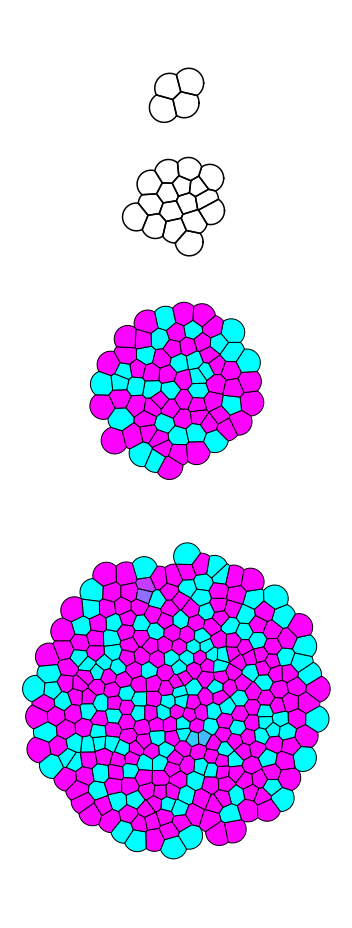

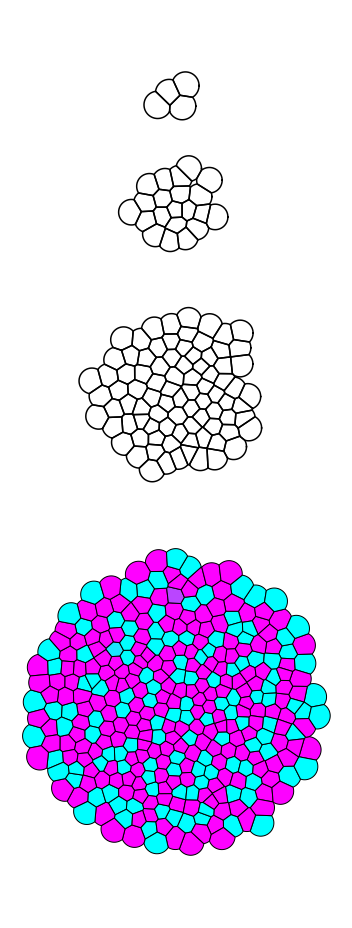

In [85]:
dim = 2
if dim == 2:
    t_div = np.log(2)/Λ_2D
elif dim == 3:
    t_div = np.log(2)/Λ_3D

t0 = t48_3D - int(t48_3D/t_div)*t_div

nofTimes = 4
k = np.unique(np.linspace(0, int(t48_3D/t_div), nofTimes+1, dtype=int))

for i in range(nofTimes):
    nofTimes = 4
    k = np.unique(np.linspace(0, int(t48_3D/t_div), nofTimes+1, dtype=int))

    plt.figure(figsize=(5,13))
    org = Organoid()
    org.eps_N = -7
    org.signal = 'neighbor'
    org.q = 0.5
    org.evolution(T=t0, dim=dim, ignore=['transcription'])

    N0 = org.r_N/org.gamma_N*3/4
    G0 = org.r_G/org.gamma_G*3/4
    org.u = np.append(np.random.normal(N0, N0*0.01, org.nofCells),
                       np.random.normal(G0, G0*0.01, org.nofCells))
    org.N = org.u[:org.nofCells]
    org.G = org.u[org.nofCells:]

    for j in range(nofTimes):
        if i > j:
            ignore=['transcription']
        else:
            ignore=[]

        org.evolution(T=(k[j+1]-k[j])*t_div, dim=dim, ignore=ignore)
        org.pos -= np.array([0,np.max(org.dist)+1.5])

        if i > j:
            N0 = org.r_N/org.gamma_N*3/4
            G0 = org.r_G/org.gamma_G*3/4
            org.u = np.append(np.random.normal(N0, N0*0.01, org.nofCells),
                               np.random.normal(G0, G0*0.01, org.nofCells))
            org.N = org.u[:org.nofCells]
            org.G = org.u[org.nofCells:]

            org.cellPlot(bounds=[0,0.1], size=0, radius='mean') 
        else:
            org.cellPlot(org.G, bounds=[0,0.1], size=0, radius='mean') 

    #lims = 11
    #plt.xlim([-lims,lims])
    plt.tight_layout()
    plt.savefig('Results/PhD Thesis/Cell division/division_number_pattern_NN_'+str(i)+'.pdf', transparent=True)
    plt.savefig('Results/PhD Thesis/Cell division/division_number_pattern_NN_'+str(i)+'.png', transparent=True)
    org.moran()
    print(org.Morans_I)

In [ ]:
dim = 2
signal = '0.9'
if dim == 2:
    t_div = np.log(2)/Λ_2D
elif dim == 3:
    t_div = np.log(2)/Λ_3D

t0 = t48_3D - int(t48_3D/t_div)*t_div

t = np.linspace(0, t48_3D-t0, int(t48_3D/t_div)+1)

DF = pd.DataFrame()
nofSim = 100
for i in range(len(t)-1):
    print('\ni =', i)
    print('j =', end=' ')
    for j in range(nofSim):
        print(j, end=' ')
        org = Organoid()
        org.eps_N = np.random.uniform(-6.5, -7.5)
        if signal == 'NN':
            org.signal = 'neighbor'
        else:
            org.signal = 'dispersion'
            org.q = float(signal)
            
        Steps0 = int(5000*(t0+t[i])/t[-1])
        Steps1 = int(5000*(t[-1]-(t0+t[i]))/t[-1])
        
        org.nofSteps = Steps0
        org.evolution(T=t0+t[i], dim=dim, ignore=['transcription'])
        N0 = org.r_N/org.gamma_N*3/4
        G0 = org.r_G/org.gamma_G*3/4
        org.u = np.append(np.random.normal(N0, N0*0.01, org.nofCells),
                           np.random.normal(G0, G0*0.01, org.nofCells))
        org.N = org.u[:org.nofCells]
        org.G = org.u[org.nofCells:]
        org.nofSteps = Steps1
        org.evolution(T=t[-1]-(t0+t[i]), dim=dim)
        org.moran()
        
        df = pd.DataFrame()
        df['ID'] = (j*(len(t)-1) + i)*np.ones(org.nofCells, dtype=int)
        df['x-Position'] = org.pos[:,0]
        df['y-Position'] = org.pos[:,1]
        if dim == 3:
            df['z-Position'] = org.pos[:,2]
        df['Radius'] = org.r
        df['N'] = org.N
        df['G'] = org.G
        df['eps_N'] = org.eps_N*np.ones(org.nofCells)
        df['t_start'] = t0 + t[i]
        df['Moran'] = org.Morans_I
        
        DF = DF.append(df)
        
DF.to_csv('Results/PhD Thesis/Cell division/division_number_'+signal+'_'+str(dim)+'D.csv', index=False)

In [96]:
t = np.linspace(t0, t48_3D, int(t48_3D/t_div))
t_div, t[0]+t_div, t

(28.29172165550797,
 36.69327815032959,
 array([  8.40155649,  40.73495267,  73.06834885, 105.40174503,
        137.73514121, 170.06853738, 202.40193356, 234.73532974]))

In [89]:
int(t48_3D/t_div)

8

In [88]:
t = np.linspace(0, t48_3D-t0, int(t48_3D/t_div)+1)
t

array([  0.        ,  32.33339618,  64.66679236,  97.00018853,
       129.33358471, 161.66698089, 194.00037707, 226.33377324])

In [52]:
DF1 = pd.read_csv('Results/PhD Thesis/Cell division/division_number_NN_2D.csv')
DF2 = pd.read_csv('Results/PhD Thesis/Cell division/division_number_0.1_2D.csv')
DF3 = pd.read_csv('Results/PhD Thesis/Cell division/division_number_0.5_2D.csv')
DF4 = pd.read_csv('Results/PhD Thesis/Cell division/division_number_0.9_2D.csv')

(331, 289, 370)

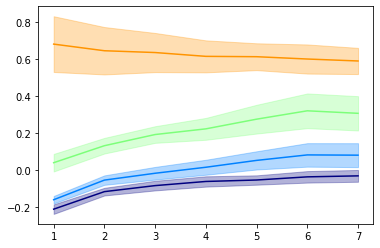

In [85]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')
test = np.linspace(0,1,5)

rgba = list(cmap(test[0]))
rgba[-1] = .3

M1_mean = DF1.groupby(['t_start']).mean().reset_index()['Moran'][::-1]
M2_mean = DF2.groupby(['t_start']).mean().reset_index()['Moran'][::-1]
M3_mean = DF3.groupby(['t_start']).mean().reset_index()['Moran'][::-1]
M4_mean = DF4.groupby(['t_start']).mean().reset_index()['Moran'][::-1]

M1_std = DF1.groupby(['t_start']).std().reset_index()['Moran'][::-1]
M2_std = DF2.groupby(['t_start']).std().reset_index()['Moran'][::-1]
M3_std = DF3.groupby(['t_start']).std().reset_index()['Moran'][::-1]
M4_std = DF4.groupby(['t_start']).std().reset_index()['Moran'][::-1]

div_num = list(range(1,len(M1_mean)+1))

plt.plot(div_num, M1_mean, color=list(cmap(test[0])))
plt.plot(div_num, M2_mean, color=list(cmap(test[1])))
plt.plot(div_num, M3_mean, color=list(cmap(test[2])))
plt.plot(div_num, M4_mean, color=list(cmap(test[3])))

plt.fill_between(div_num, M1_mean-M1_std, M1_mean+M1_std, color=list(cmap(test[0])), alpha = 0.3)
plt.fill_between(div_num, M2_mean-M2_std, M2_mean+M2_std, color=list(cmap(test[1])), alpha = 0.3)
plt.fill_between(div_num, M3_mean-M3_std, M3_mean+M3_std, color=list(cmap(test[2])), alpha = 0.3)
plt.fill_between(div_num, M4_mean-M4_std, M4_mean+M4_std, color=list(cmap(test[3])), alpha = 0.3)

In [81]:
print(M1_mean, M1_mean[::-1])

6   -0.213553
5   -0.118687
4   -0.086041
3   -0.063598
2   -0.055747
1   -0.038608
0   -0.033262
Name: Moran, dtype: float64 0   -0.033262
1   -0.038608
2   -0.055747
3   -0.063598
4   -0.086041
5   -0.118687
6   -0.213553
Name: Moran, dtype: float64


### Experimental data

In [1]:
from ExpData import ExpData

dat = ExpData('Data/includingSurfaceDistance/extendedRawDataICMOrganoids.csv')
dat.pcf_bounds(1, 10)

In [5]:
IDs = list(range(1,77))
IDs_24 = []
IDs_48 = []
for ID in IDs:
    if dat.info(ID, output=True)[0] == '24h':
        IDs_24.append(ID)
    if dat.info(ID, output=True)[0] == '48h':
        IDs_48.append(ID)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 24, 25, 26, 27, 28, 44, 45, 46, 55, 56, 57, 58, 59, 60, 69, 70, 71, 72, 73, 74, 75, 76] [7, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 61, 62, 63, 64, 65, 66, 67, 68]


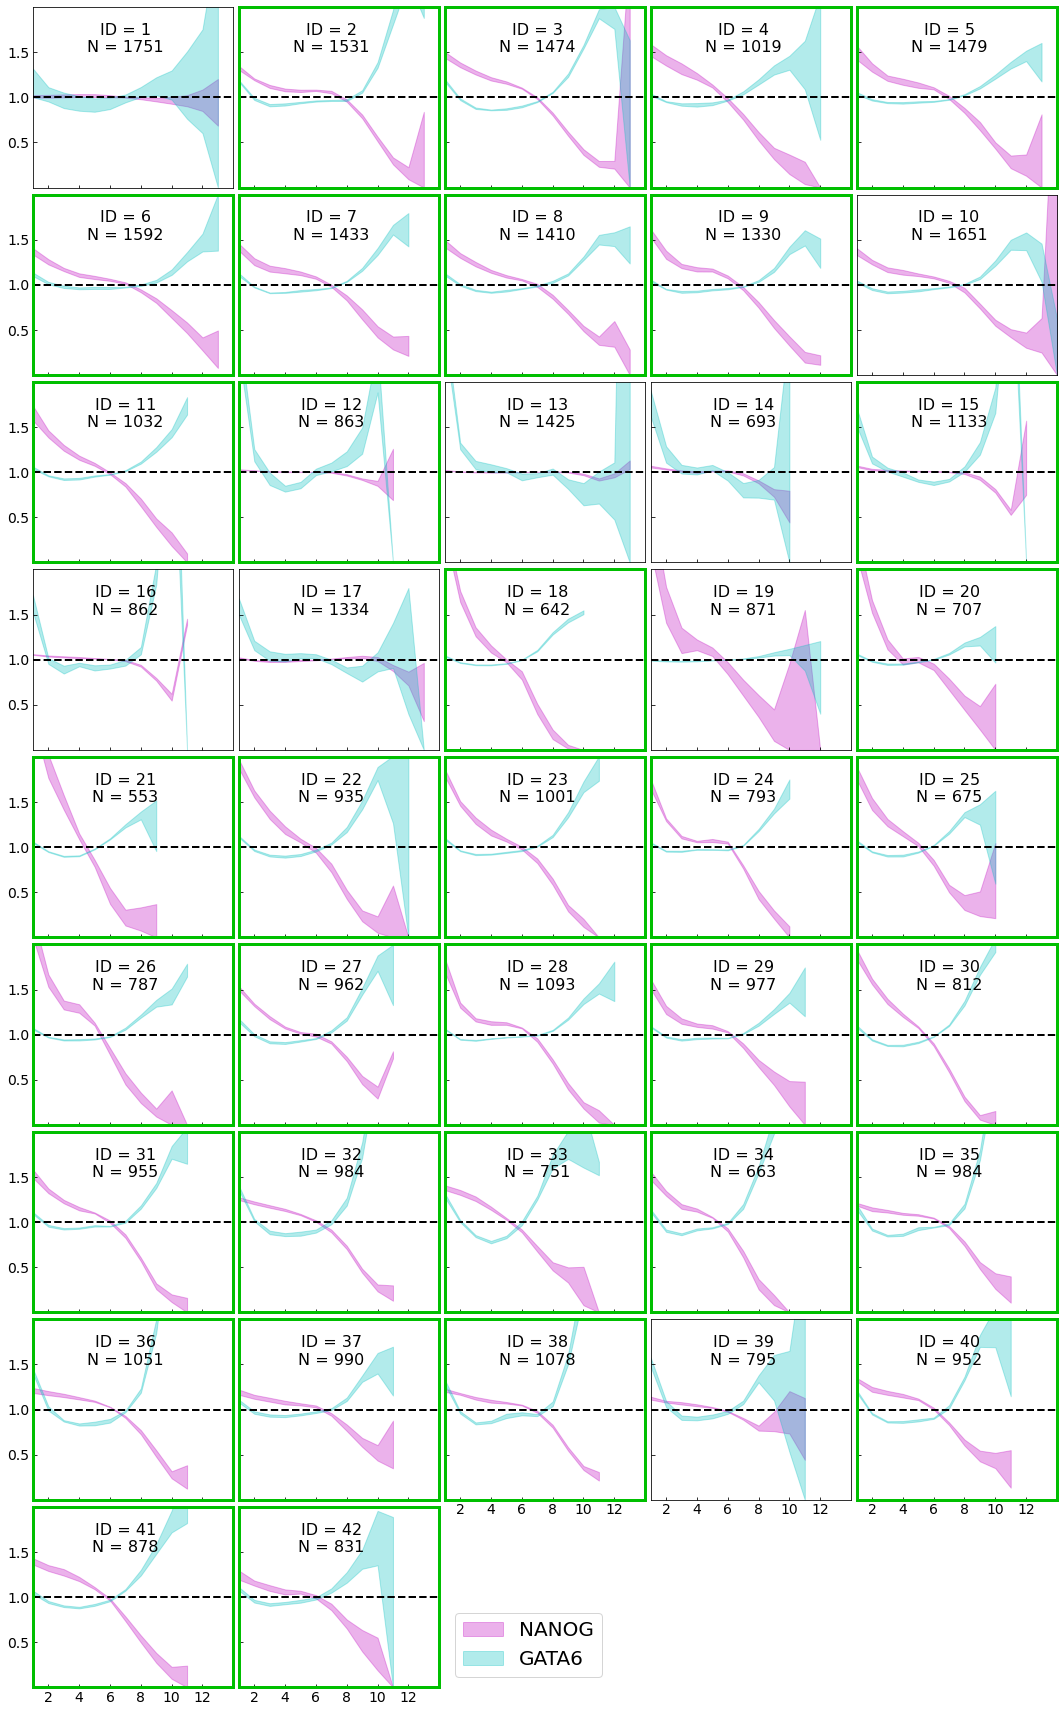

In [188]:
maxlen = 0
maxval = 0
for ID in IDs_48:
    dat.pcf_bounds(ID, 1000, plot=False)
    if len(dat.pcf[ID][0]) > maxlen:
        maxlen = len(dat.pcf[ID][0])
    if dat.pcf[ID].max() > maxval:
        maxval = dat.pcf[ID].max()

dist = list(range(1,maxlen+1))

m = 5
n = int(len(IDs_48)/m)+1
bad = [1,10,13,14,16,17,19,39,]
plt.figure(figsize=(3*m,3*n-3))
plt.rc('font', size=14)
for i, ID in enumerate(IDs_48+[1000]):
    
    if ID == 1000:
        N0, G0 = [0], [0]
        N1, G1 = [0], [0]
        
    else:
        N0 = dat.pcf[ID][0]
        N1 = dat.pcf[ID][2]

        G0 = dat.pcf[ID][3]
        G1 = dat.pcf[ID][5]
    
    dist = list(range(1,len(N0)+1))
    plt.subplot(n, m, i+1)
    plt.fill_between(dist, N0, N1, color='m', alpha=0.3)
    plt.fill_between(dist, G0, G1, color='c', alpha=0.3)
    plt.xlim([1,maxlen])
    plt.ylim([0,2])
    if (i % m) == 0:
        plt.yticks([.5,1,1.5])
    else:
        plt.yticks([.5,1,1.5], labels=[])
        
    if i >= len(IDs_48)-m:
         plt.xticks(np.arange(2, maxlen, 2.0))
    else:
         plt.xticks(np.arange(2, maxlen, 2.0), labels=[])
    if ID == 1000:
        plt.legend(['NANOG', 'GATA6'], fontsize=20, loc='lower left')
        plt.axis('off')
    else:
        plt.text(maxlen/2, 1.5, 'ID = '+str(i+1)+'\nN = '+str(dat.info(ID, output=True)[1]), fontsize=16, ha='center')
        plt.axhline(1, lw=2, linestyle='dashed', color='k')
       
    if i+1 not in bad:
        ax = plt.gca()
        plt.setp(ax.spines.values(), linewidth=3, color=[0,.75,0,1])
    #else:
    #    ax = plt.gca()
    #    plt.setp(ax.spines.values(), linewidth=3, color=[.75,0,0,1])
    plt.tick_params(direction="in")

#plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.tight_layout(h_pad=-.75, w_pad=-.5)
plt.savefig('Results/PhD Thesis/Exp data/48h.pdf', transparent=True, layout='tight')
plt.savefig('Results/PhD Thesis/Exp data/48h.png', transparent=True, layout='tight')

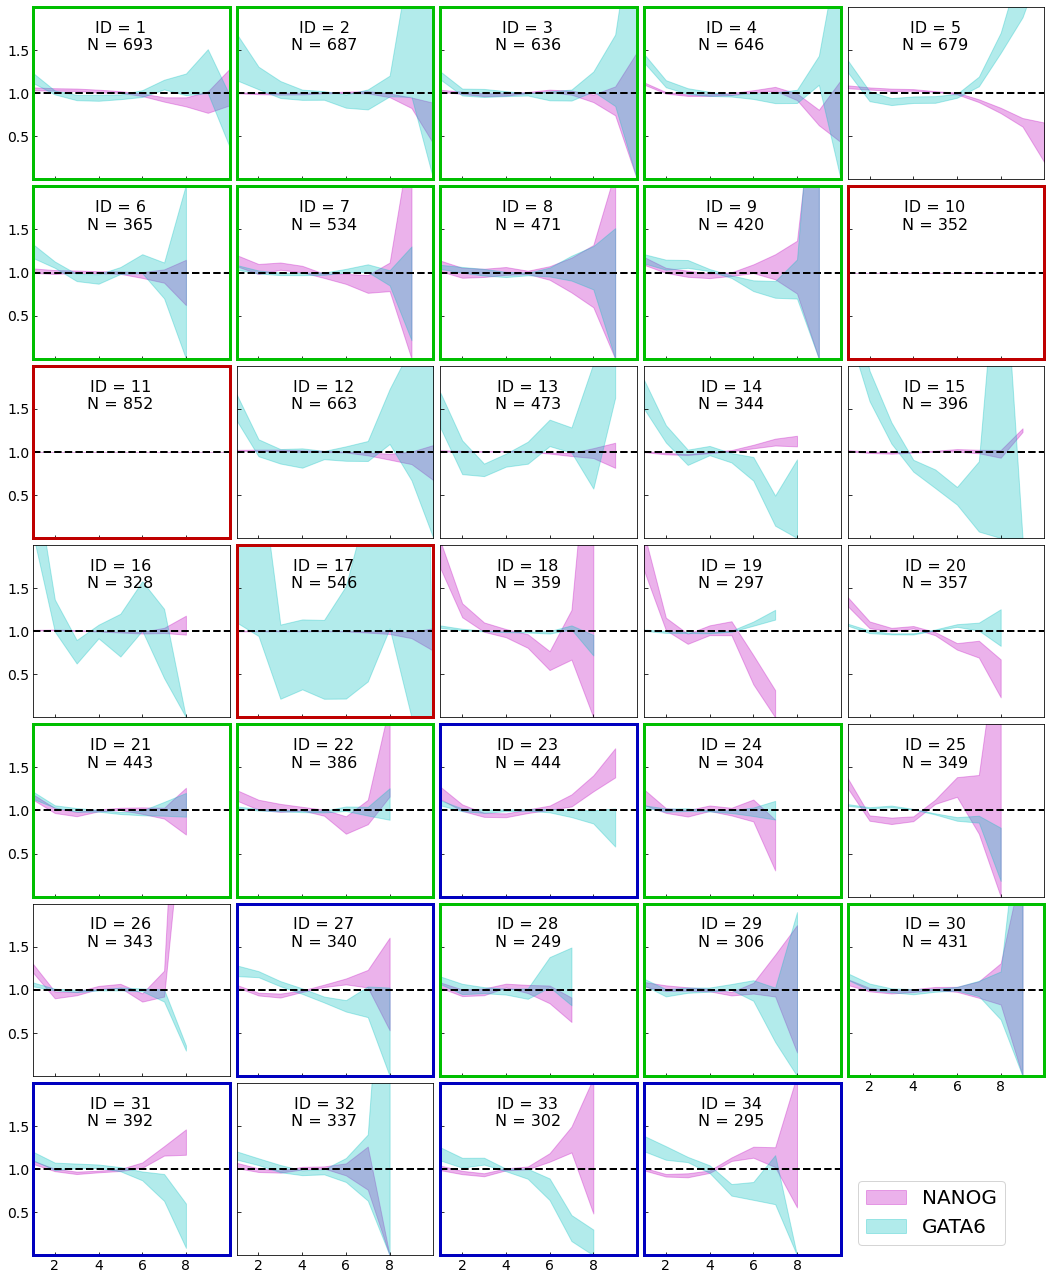

In [189]:
maxlen = 0
maxval = 0
for ID in IDs_24:
    dat.pcf_bounds(ID, 1000, plot=False)
    if len(dat.pcf[ID][0]) > maxlen:
        maxlen = len(dat.pcf[ID][0])
    if dat.pcf[ID].max() > maxval:
        maxval = dat.pcf[ID].max()

dist = list(range(1,maxlen+1))

m = 5
n = int(len(IDs_24)/m)+1
green = [1, 2, 3, 4, 6, 7, 8, 9, 21, 22, 24, 28, 29, 30]
blue = [23, 27, 31, 33, 34]
red = [10, 11, 17]
plt.figure(figsize=(3*m,3*n-3))
plt.rc('font', size=14)
for i, ID in enumerate(IDs_24+[1000]):
    
    if ID == 1000:
        N0, G0 = [0], [0]
        N1, G1 = [0], [0]
        
    else:
        N0 = dat.pcf[ID][0]
        N1 = dat.pcf[ID][2]

        G0 = dat.pcf[ID][3]
        G1 = dat.pcf[ID][5]
    
    dist = list(range(1,len(N0)+1))
    plt.subplot(n, m, i+1)
    plt.fill_between(dist, N0, N1, color='m', alpha=0.3)
    plt.fill_between(dist, G0, G1, color='c', alpha=0.3)
    plt.xlim([1,maxlen])
    plt.ylim([0,2])
    if (i % m) == 0:
        plt.yticks([.5,1,1.5])
    else:
        plt.yticks([.5,1,1.5], labels=[])
        
    if i >= len(IDs_24)-m:
         plt.xticks(np.arange(2, maxlen, 2.0))
    else:
         plt.xticks(np.arange(2, maxlen, 2.0), labels=[])
    if ID == 1000:
        plt.legend(['NANOG', 'GATA6'], fontsize=20, loc='lower left')
        plt.axis('off')
    else:
        plt.text(maxlen/2, 1.5, 'ID = '+str(i+1)+'\nN = '+str(dat.info(ID, output=True)[1]), fontsize=16, ha='center')
        plt.axhline(1, lw=2, linestyle='dashed', color='k')
       
    if i+1 in green:
        ax = plt.gca()
        plt.setp(ax.spines.values(), linewidth=3, color=[0,.75,0,1])
    elif i+1 in red:
        ax = plt.gca()
        plt.setp(ax.spines.values(), linewidth=3, color=[.75,0,0,1])
    elif i+1 in blue:
        ax = plt.gca()
        plt.setp(ax.spines.values(), linewidth=3, color=[0,0,.75,1])

    plt.tick_params(direction="in")

#plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.tight_layout(h_pad=-0.75, w_pad=.5)
plt.savefig('Results/PhD Thesis/Exp data/24h.pdf', transparent=True, layout='tight')
plt.savefig('Results/PhD Thesis/Exp data/24h.png', transparent=True, layout='tight')

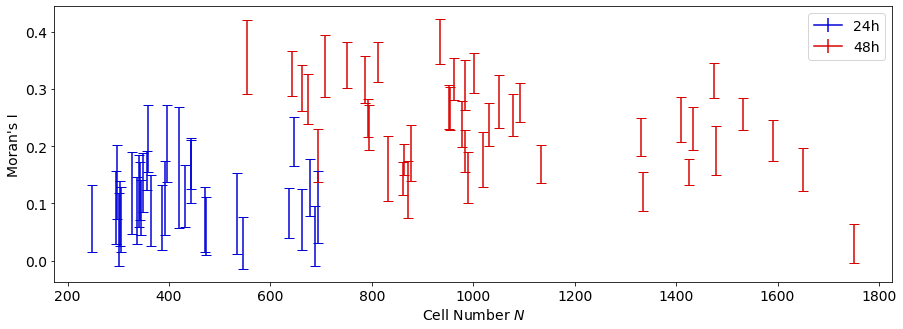

In [271]:
for ID in IDs:
    dat.moran_bounds(ID, 1000)
    
plt.figure(figsize=[12.8, 4.8])
plt.rc('font', size=14)
for i, ID in enumerate(IDs_24):
    y = (dat.moran[ID][0] + dat.moran[ID][2])/2
    plt.errorbar(dat.info(ID, output=True)[1], y, yerr=dat.moran[ID][2]-y, color=[0,0,.85,1], capsize=5)
    
for i, ID in enumerate(IDs_48):
    y = (dat.moran[ID][0] + dat.moran[ID][2])/2
    plt.errorbar(dat.info(ID, output=True)[1], y, yerr=dat.moran[ID][2]-y, color=[.85,0,0,1], capsize=5)


plt.errorbar([1000], [0.2], yerr=0, color=[0,0,.85,1], label='24h')
plt.errorbar([1000], [0.2], yerr=0, color=[.85,0,0,1], label='48h')

plt.legend()
plt.xlabel('Cell Number $N$')
plt.ylabel('Moran\'s I')
plt.tight_layout()
plt.savefig('Results/PhD Thesis/Exp data/Moran.pdf', transparent=True)
plt.savefig('Results/PhD Thesis/Exp data/Moran.png', transparent=True)

In [261]:
vals = []
nums = []
for ID in IDs:
    if dat.moran[ID][1] == dat.moran[ID][1]:
        vals.append(dat.moran[ID][1])
        nums.append(dat.info(ID, output=True)[1])

cor = np.corrcoef(np.log(nums), vals)
print(cor)

[[1.         0.47091553]
 [0.47091553 1.        ]]
